# DQNの解説
<p class="sumary">こちらではReNom RLのDQNの使い方について紹介します</p>

本チュートリアルでは OpenAIの"CartPole-v0"を使用します。

## Cart Pole とは何か？

CartPoleの目的はカートを動かしながら、棒をできるだけ長く垂直に立たせることです。落下しない限り、成功とします。状態はカート位置、カート速度、棒の回転角度、棒の先端速度とします。行動は右か左かのどちらかです。実施に動作してみましょう。

/Users/mikeogawa/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


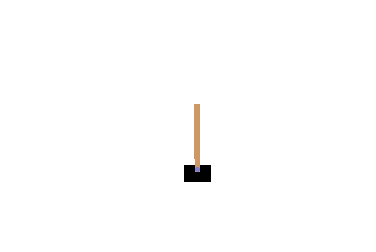

In [3]:
import matplotlib.pyplot as plt
import gym

env=gym.make("CartPole-v0")
env.reset()
plt.imshow(env.render(mode="rgb_array"))
env.close()
plt.axis("off");

## 

## Required Libraries

- ReNomDL 2.6
- ReNomRL 0.2
- Numpy 1.14
- matplotlib 2.2.3


In [4]:
import gym
import numpy as np
import renom as rm
from renom_rl.discrete.dqn import DQN
from renom_rl.environ.env import BaseEnv
from renom_rl.utility import Animation
import matplotlib.pyplot as plt

## 環境の定義

ReNomRLでは環境を ``BaseEnv`` クラスを親クラスとして利用する必要があります。

In [1]:
class CustomEnv(BaseEnv):
    
    def __init__(self, env):
        self.action_shape = (2,)
        self.state_shape = (4,)
     
        self.env=env
        self.step_continue=0
        self.successful_episode=0
        self.animation=Animation()
        self.test_mode=False
        self.reward=0
        
    def reset(self):
        return self.env.reset()
        
    
    def sample(self):
        rand=env.action_space.sample()
        return rand
    
    def step(self, action):
        state,_,terminal,_=env.step(int(action))
        
        self.step_continue+=1
        reward=0
        
        if terminal:
            if self.step_continue >= 200:
                reward=1
                if self.test_mode==False:
                    print(self.successful_episode)
                    self.successful_episode+=1
            else:
                reward=-1
            self.step_continue=0
        
        if self.test_mode==True:
            self.animation.store(self.env.render(mode="rgb_array"))
        
        self.reward=reward
        
        return state, reward, terminal
    
    def terminate(self):
            if self.successful_episode >= 10:
                self.successful_episode=0
                return True
            else:
                return False

    def test_start(self):
        self.animation.reset()
        self.test_mode=True

    def test_step(self):
        self.animation.store(self.env.render(mode="rgb_array"))

    def test_close(self):
        self.env.close()
        self.env.viewer=None
        self.test_mode=False
 
    def reset_anime(self):
        self.animation.reset()

        
env = gym.make('CartPole-v0')
custom_env = CustomEnv(env)

q_network = rm.Sequential([rm.Dense(30, ignore_bias=True),
                           rm.Relu(),
                           rm.Dense(30, ignore_bias=True),
                           rm.Relu(),
                           rm.Dense(custom_env.action_shape[0], ignore_bias=True)])

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/mikeogawa/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


In [2]:
model = DQN(custom_env, q_network)
print(custom_env.state_shape[0])

4


In [3]:
from renom_rl.utility import EpsilonGreedyFilter
obj=EpsilonGreedyFilter(min=0.1,max=0.4,initial=0.3,alpha=1,test_epsilon=0.1,epsilon_step=2000)

0.4


In [4]:
result = model.fit( epoch=500,
                    epoch_step=250000,
                    batch_size=32,
                    random_step=32,
                    test_step=None,
                    update_period=2,
                    train_frequency=1,
                    action_filter=obj,                   
                  )

epoch 0001 greedy 0.2976 loss 0.0197 rewards in epoch 0.000 episode 0000 rewards in episode 0.000.:   0%|          | 16/250000 [00:00<42:04, 99.04it/s] 

Run random 32 step for storing experiences


epoch 0001 greedy 0.1000 loss 0.0020 rewards in epoch -32.000 episode 0034 rewards in episode 1.000.:   1%|          | 1365/250000 [00:13<39:37, 104.57it/s] 

0


epoch 0001 greedy 0.1000 loss 0.0102 rewards in epoch -33.000 episode 0037 rewards in episode 1.000.:   1%|          | 1821/250000 [00:18<43:22, 95.35it/s]  

1


epoch 0001 greedy 0.1000 loss 0.0156 rewards in epoch -34.000 episode 0040 rewards in episode 1.000.:   1%|          | 2259/250000 [00:23<40:28, 102.00it/s] 

2


epoch 0001 greedy 0.1000 loss 0.0003 rewards in epoch -33.000 episode 0041 rewards in episode 1.000.:   1%|          | 2459/250000 [00:25<41:02, 100.52it/s]

3


epoch 0001 greedy 0.1000 loss 0.0089 rewards in epoch -32.000 episode 0042 rewards in episode 1.000.:   1%|          | 2659/250000 [00:27<40:09, 102.65it/s]

4


epoch 0001 greedy 0.1000 loss 0.0016 rewards in epoch -31.000 episode 0043 rewards in episode 1.000.:   1%|          | 2854/250000 [00:29<53:13, 77.38it/s] 

5


epoch 0001 greedy 0.1000 loss 0.0027 rewards in epoch -30.000 episode 0044 rewards in episode 1.000.:   1%|          | 3057/250000 [00:31<53:31, 76.89it/s]

6


epoch 0001 greedy 0.1000 loss 0.0002 rewards in epoch -30.000 episode 0046 rewards in episode 1.000.:   1%|▏         | 3435/250000 [00:35<39:39, 103.63it/s] 

7


epoch 0001 greedy 0.1000 loss 0.0086 rewards in epoch -29.000 episode 0047 rewards in episode 1.000.:   1%|▏         | 3636/250000 [00:37<38:27, 106.76it/s]

8


epoch 0001 greedy 0.1000 loss 0.0080 rewards in epoch -29.000 episode 0049 rewards in episode 1.000.:   2%|▏         | 4001/250000 [00:40<41:53, 97.88it/s]  

9
terminated


In [5]:
model.test()

1.0


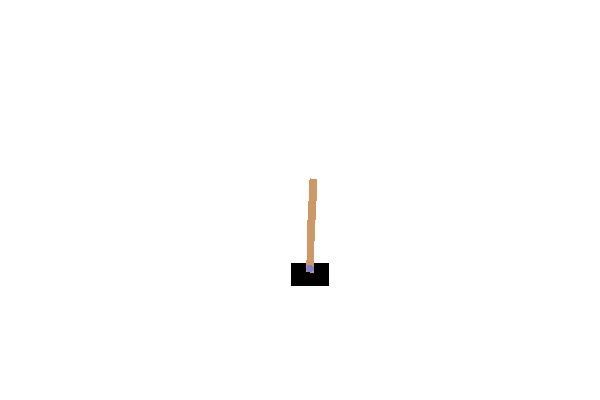
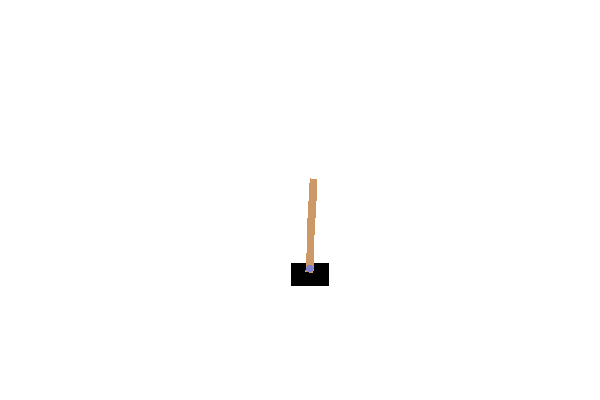
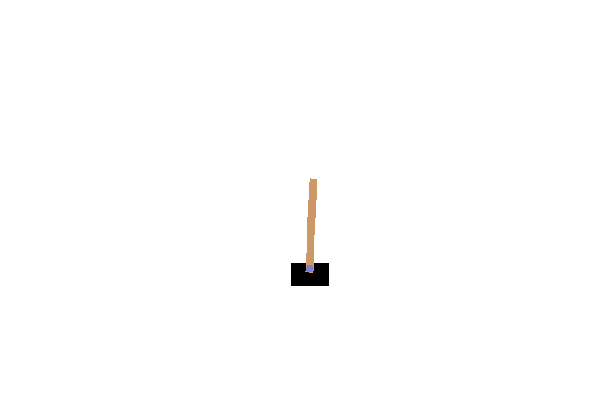
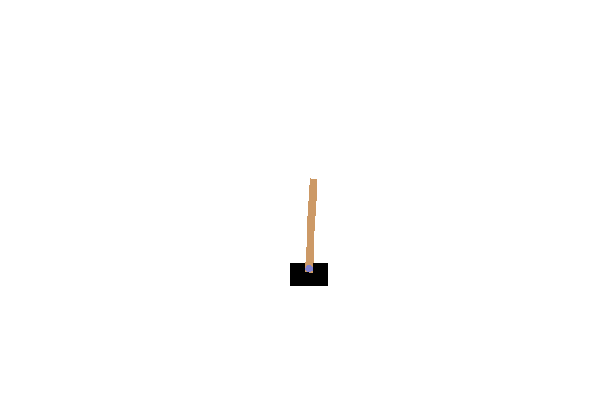
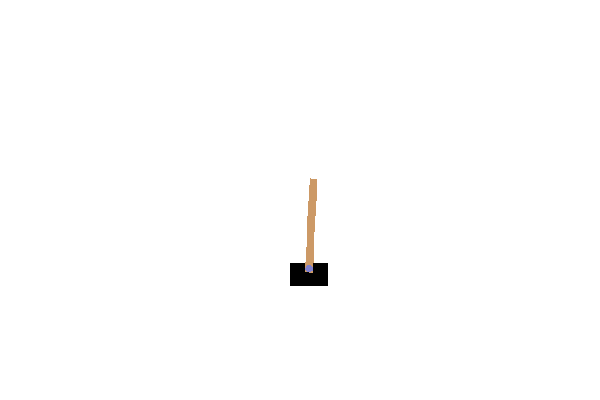
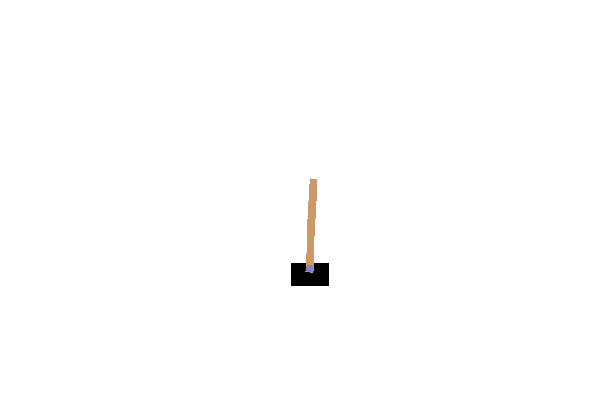
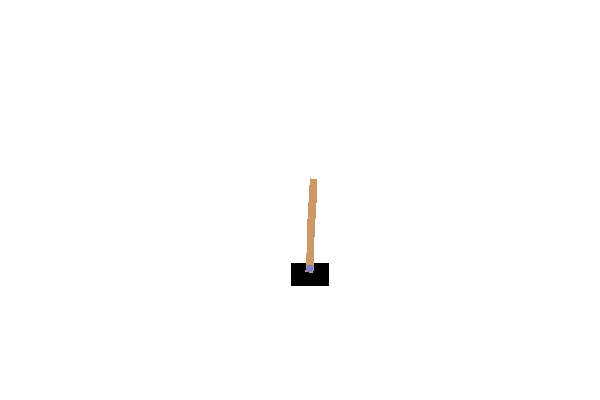
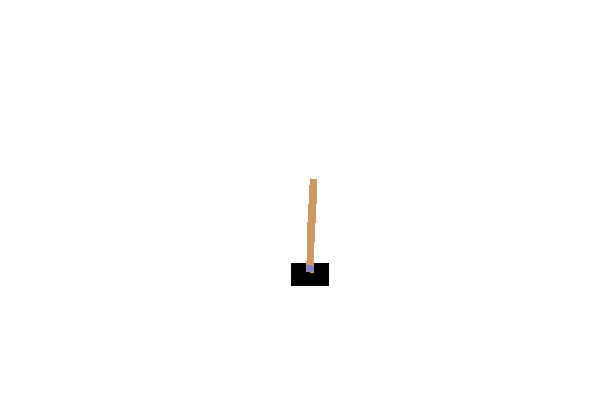
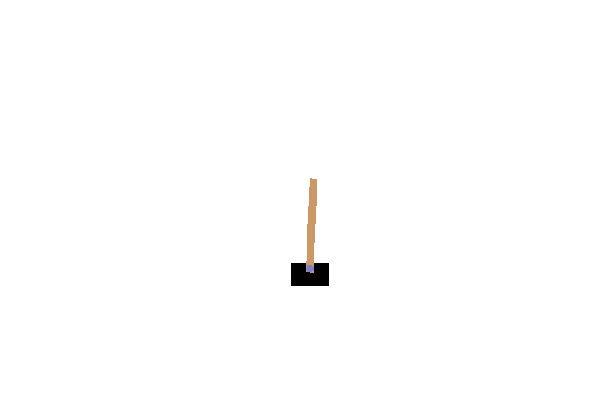
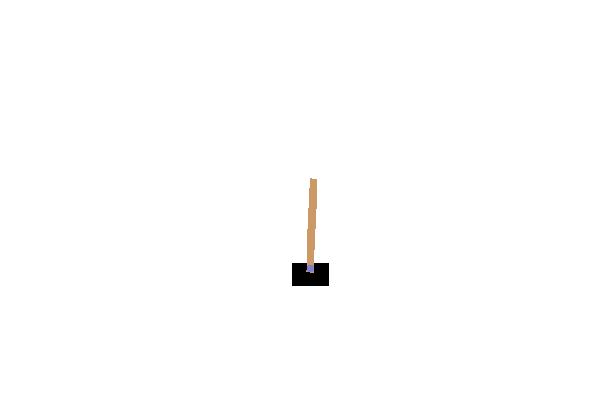
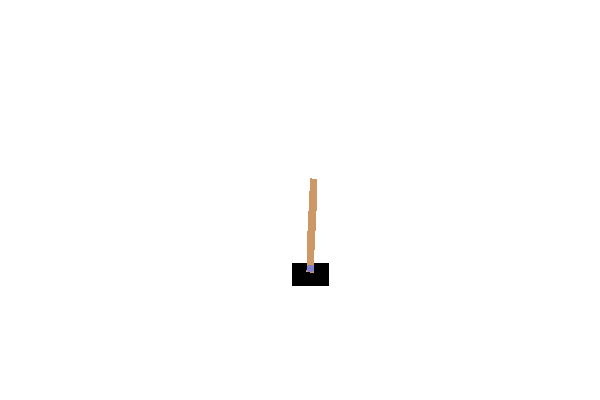
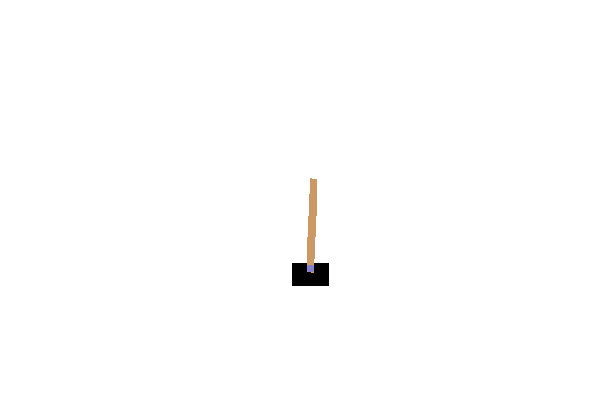
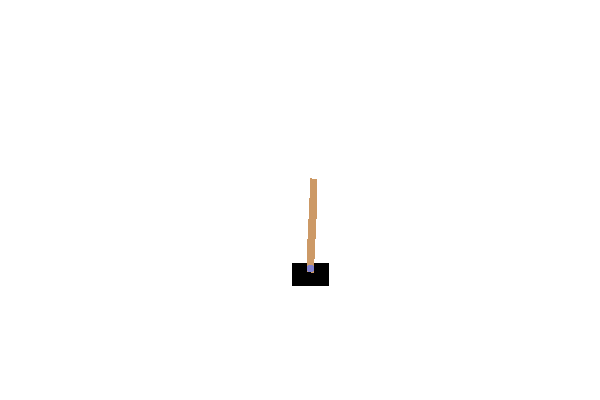
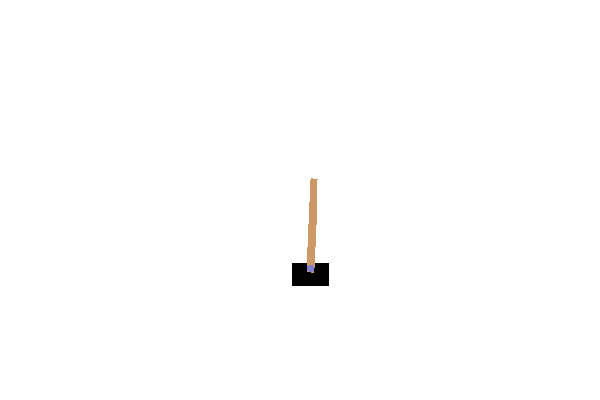
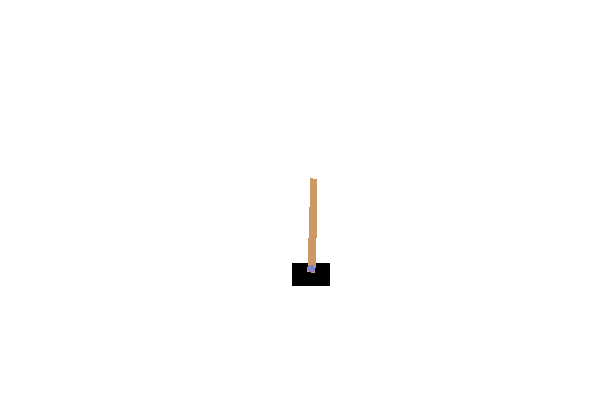
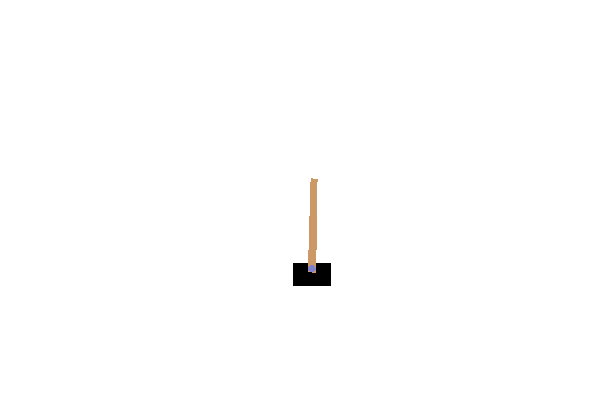
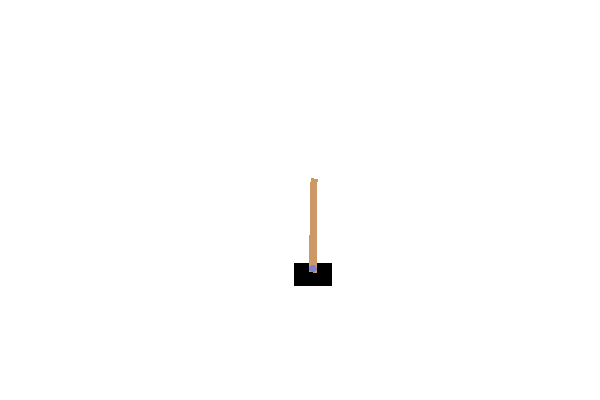
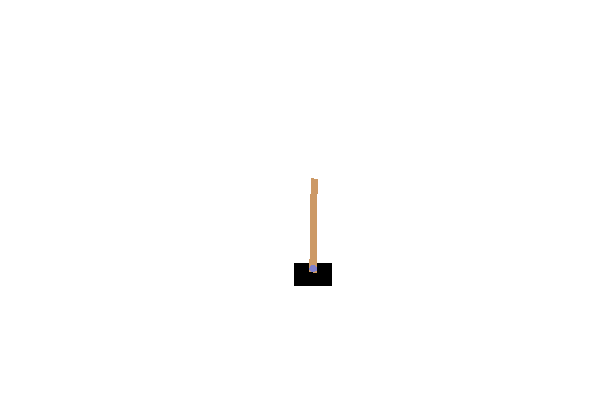
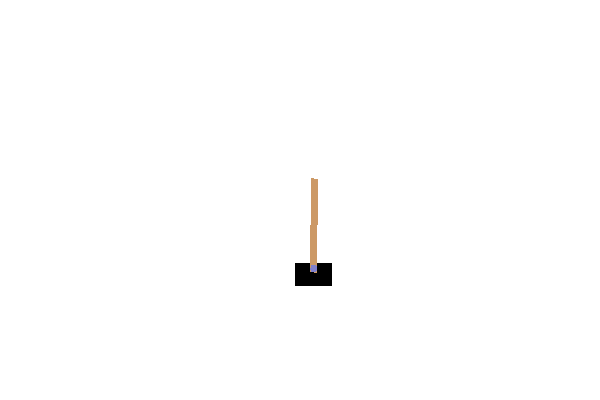
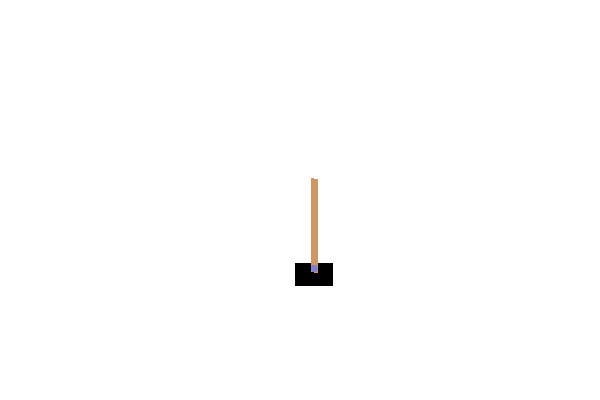
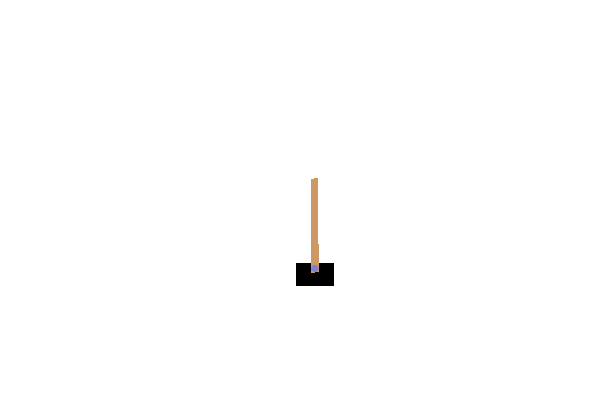
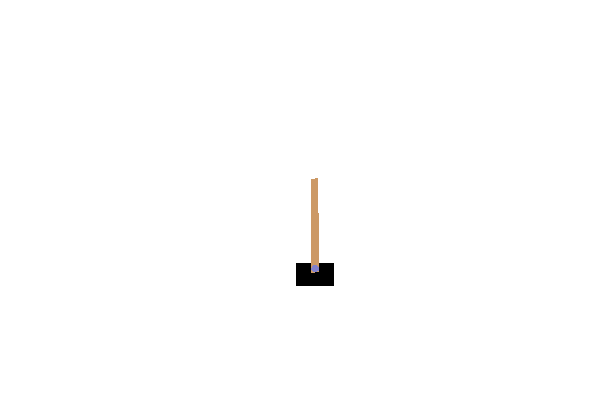
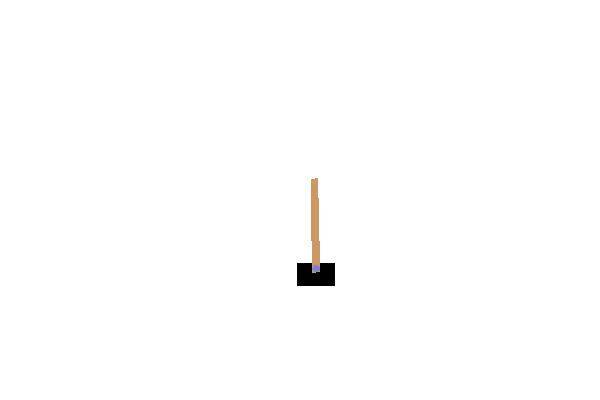
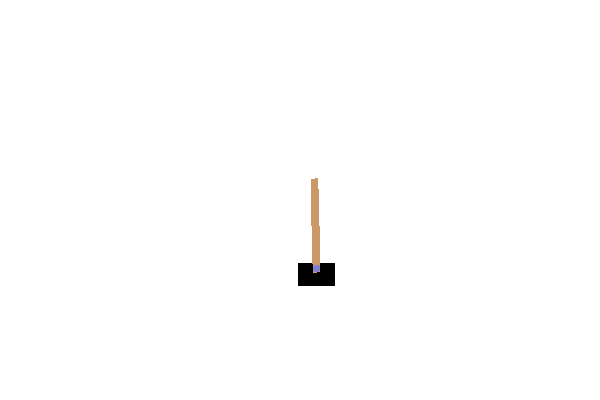
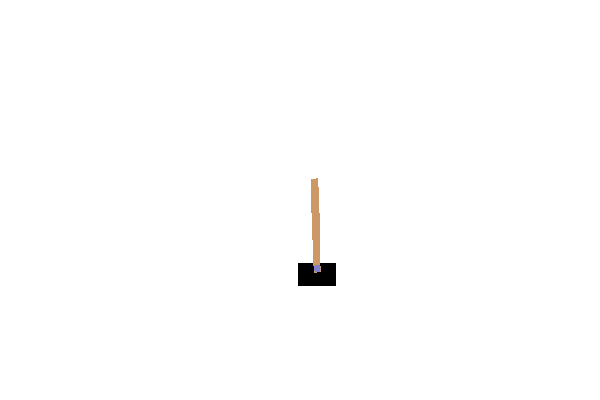
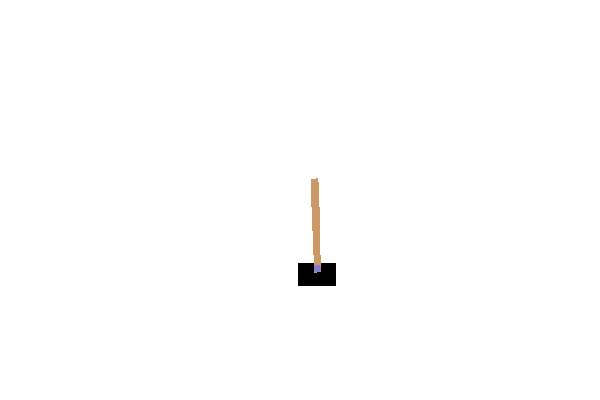
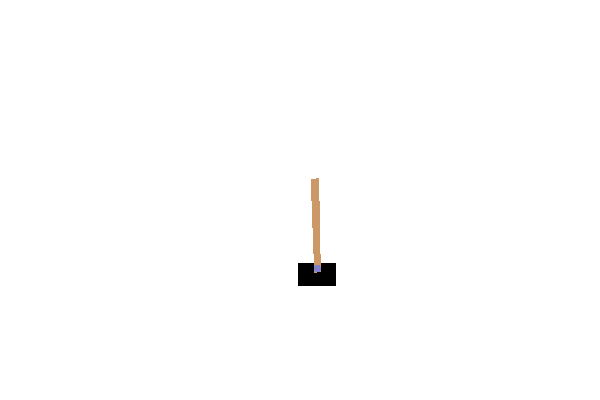
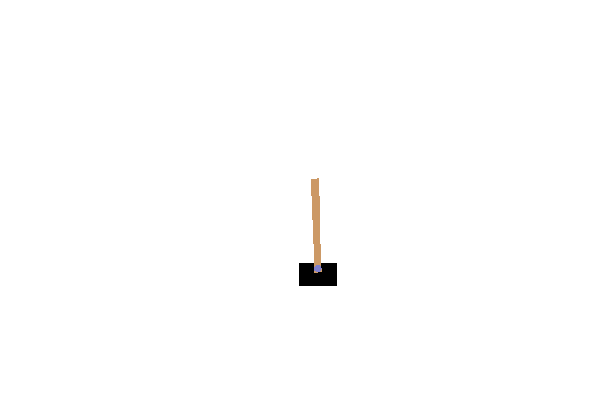
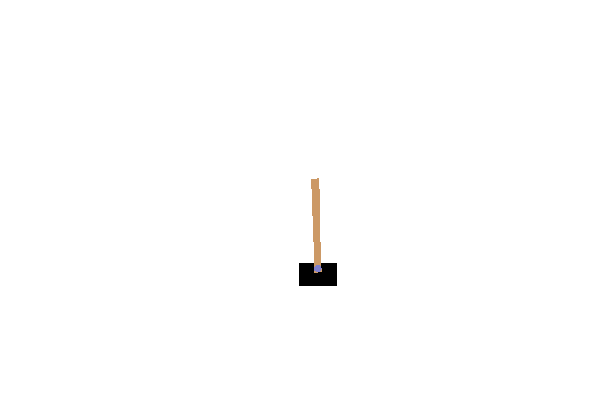
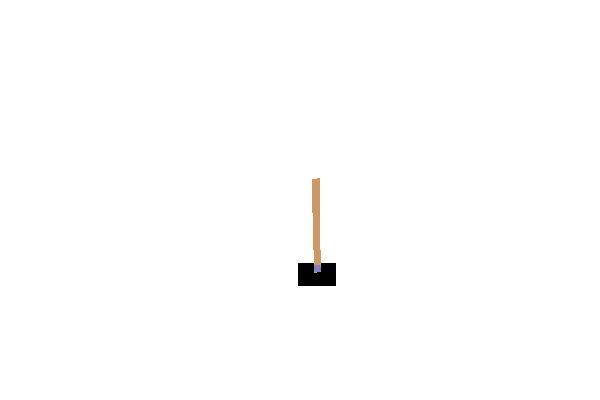
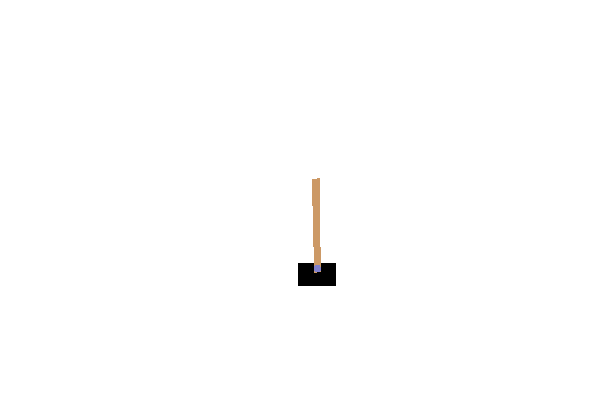
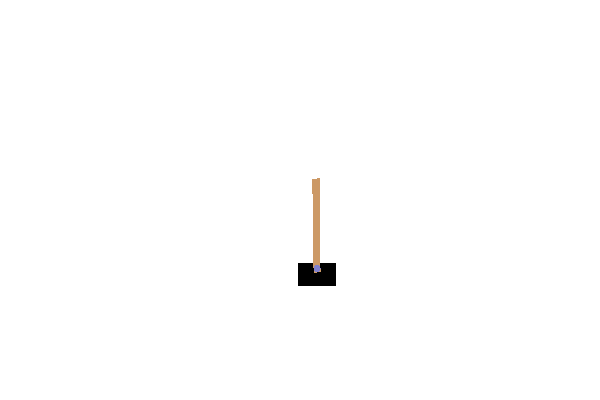
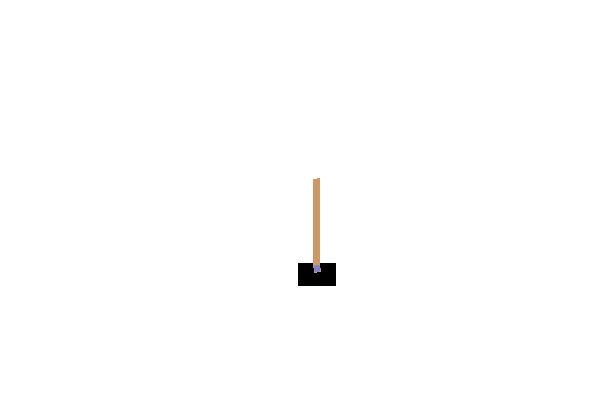
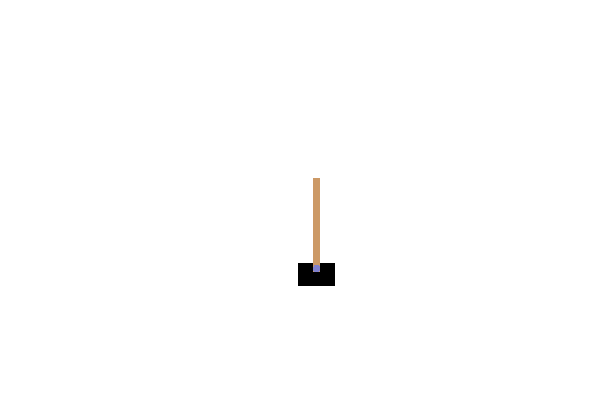
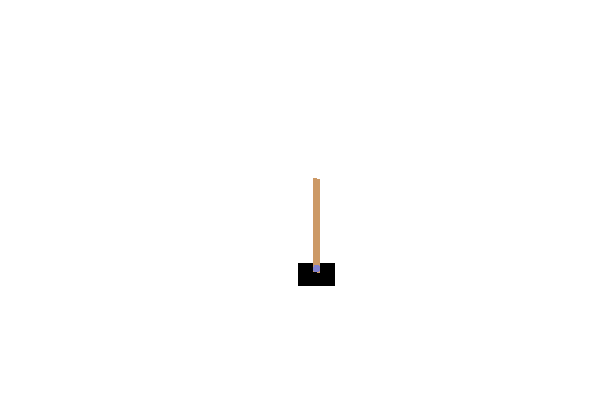
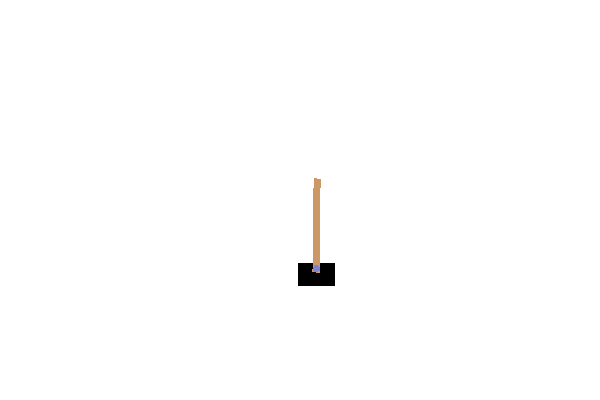
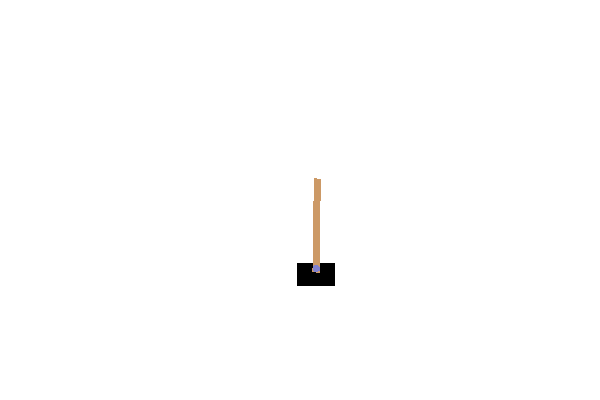
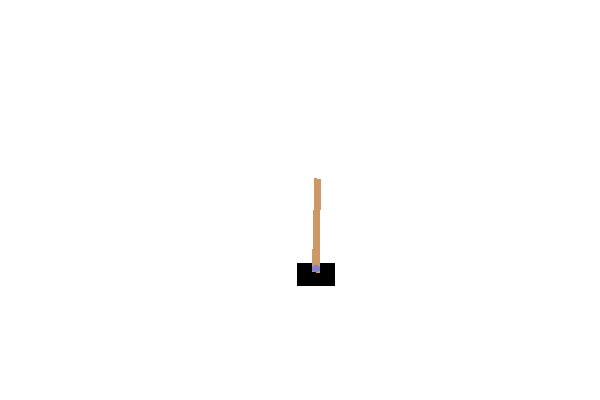
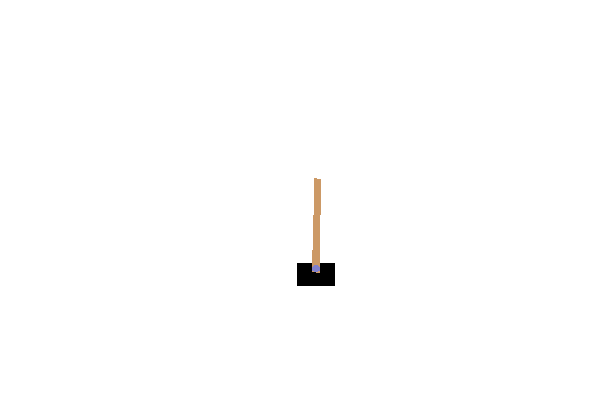
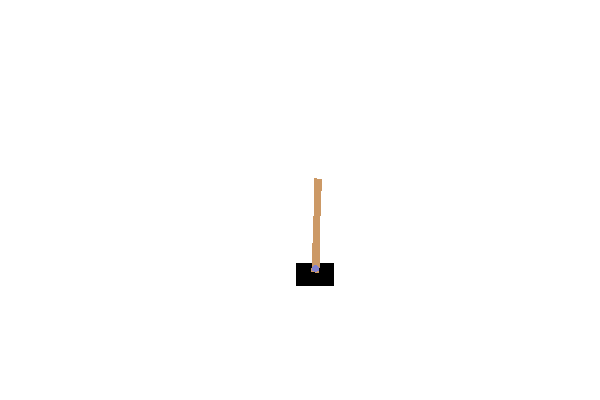
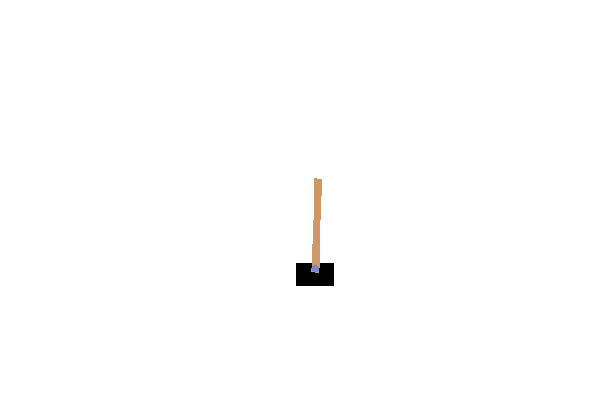
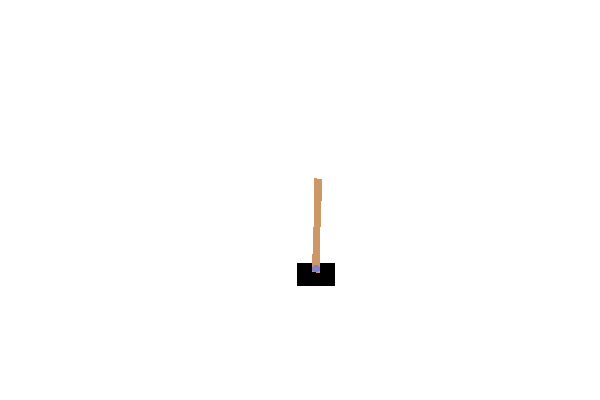
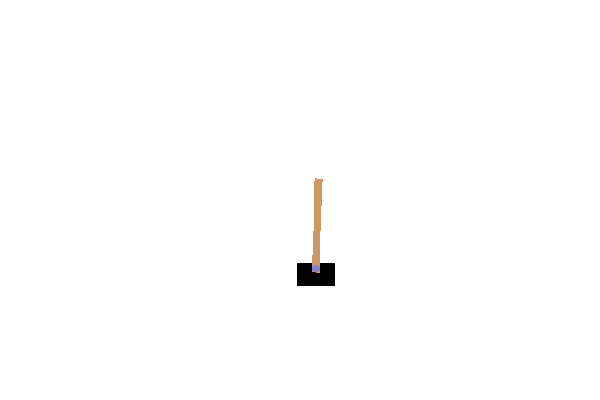
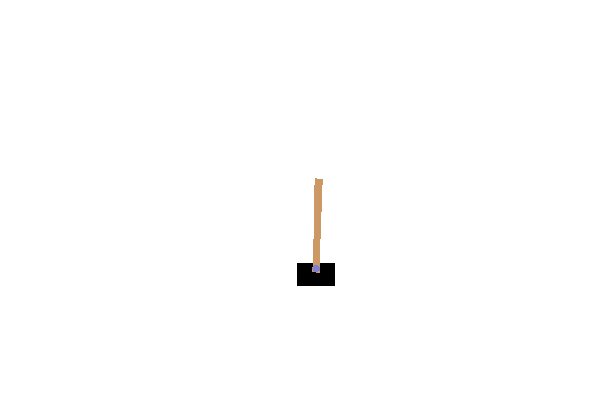
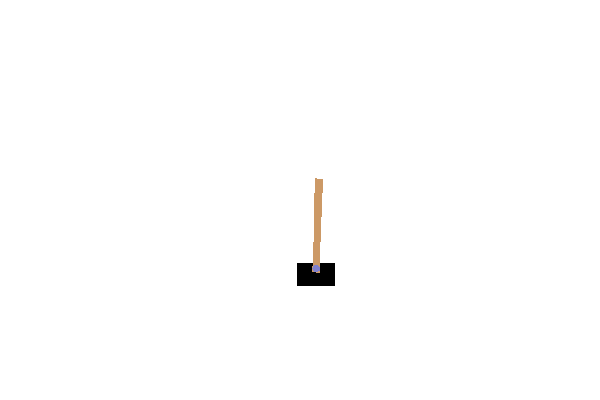
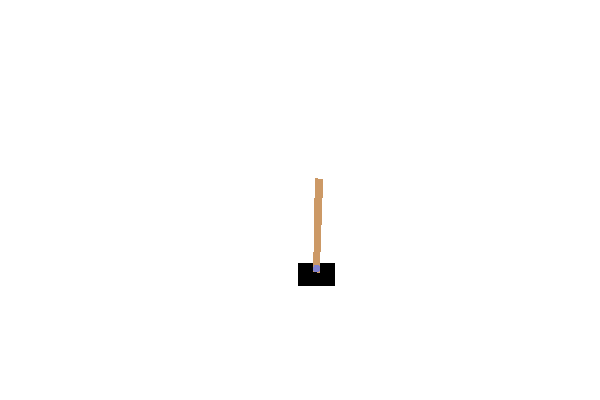
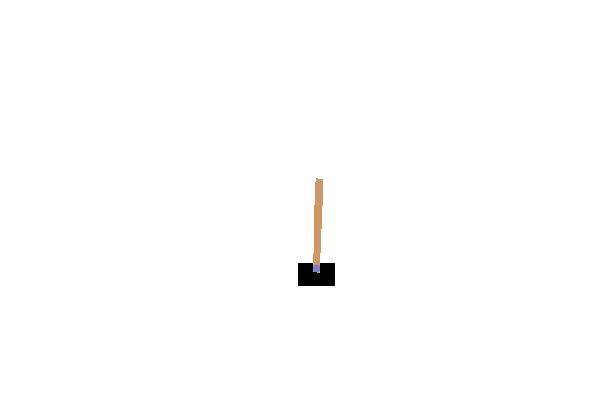
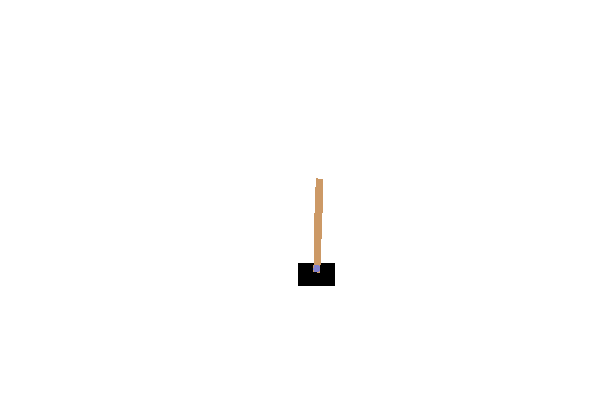
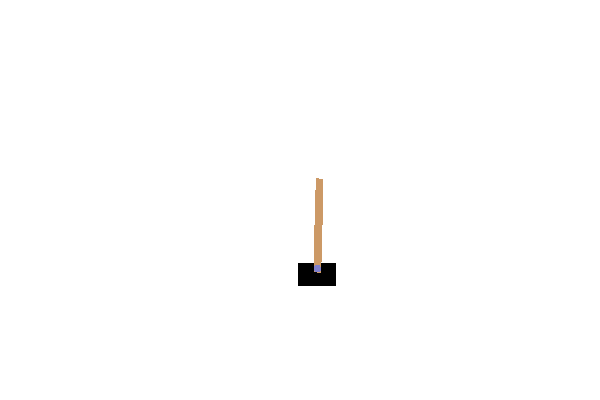
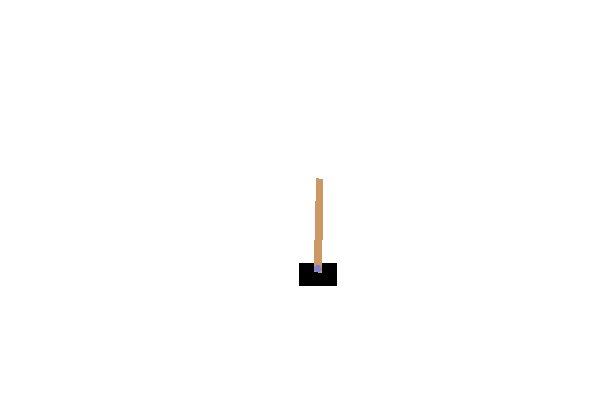
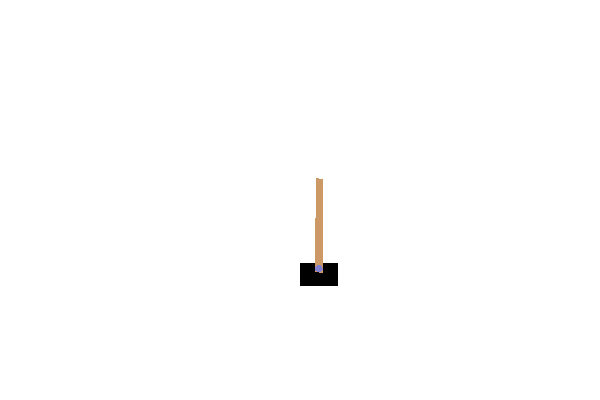
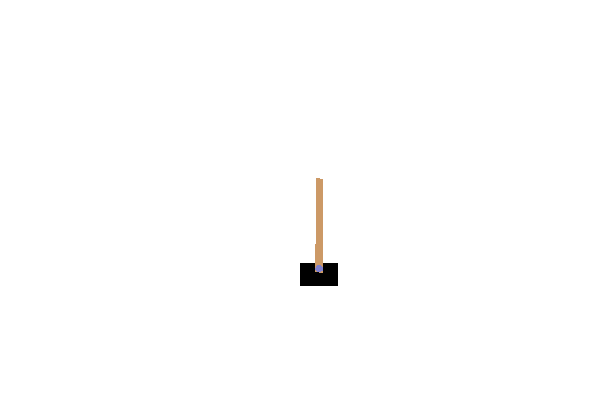
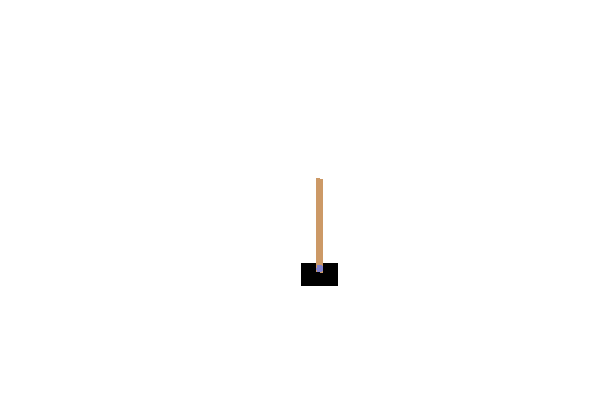
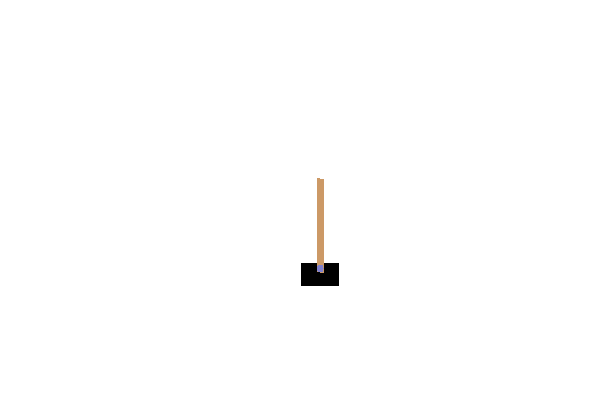
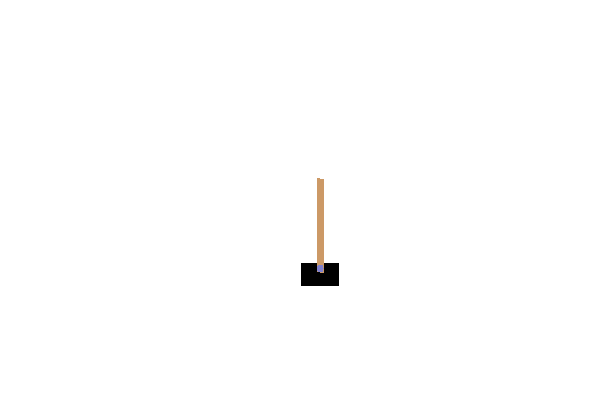
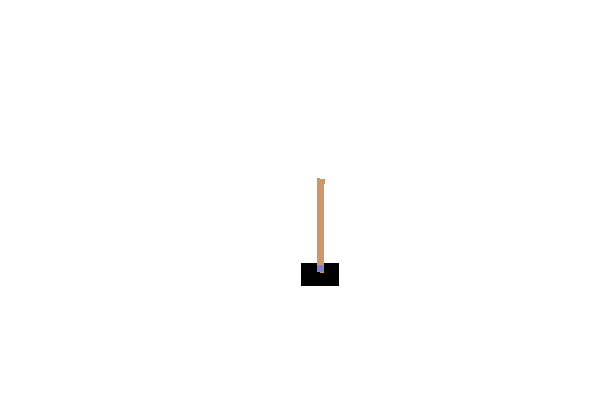
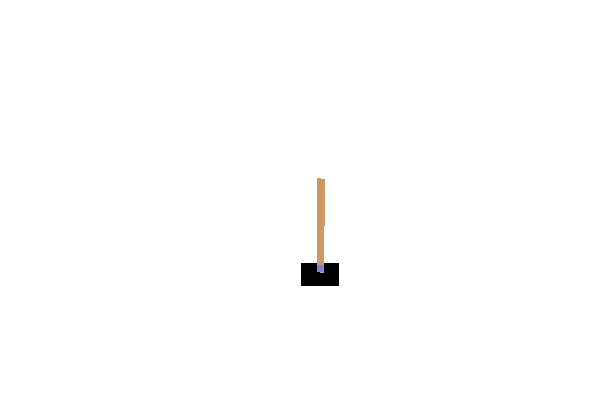
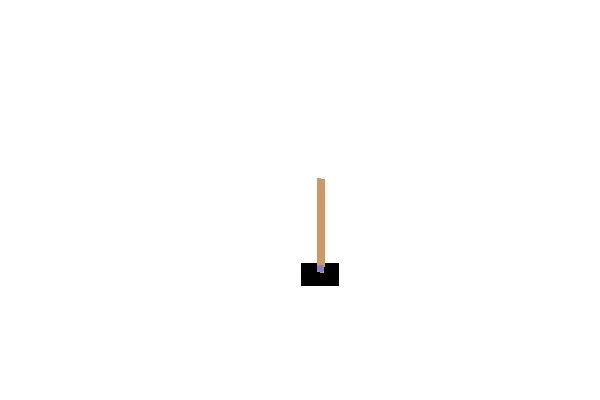
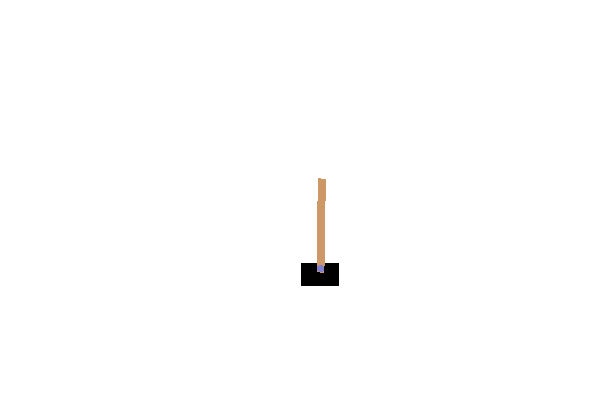
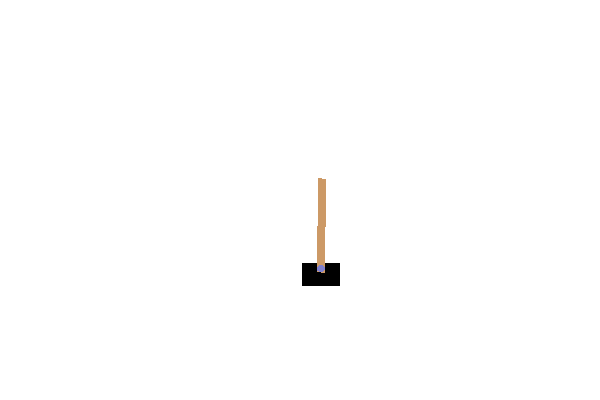
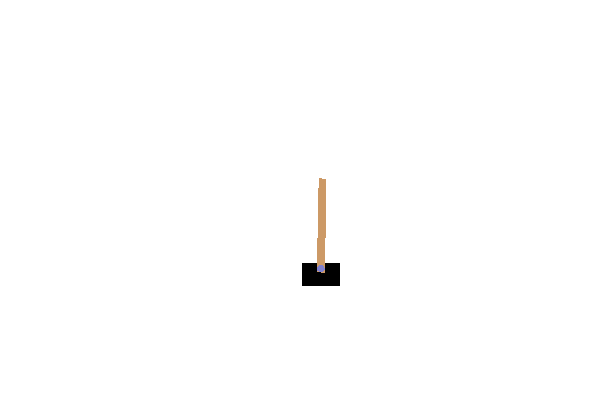
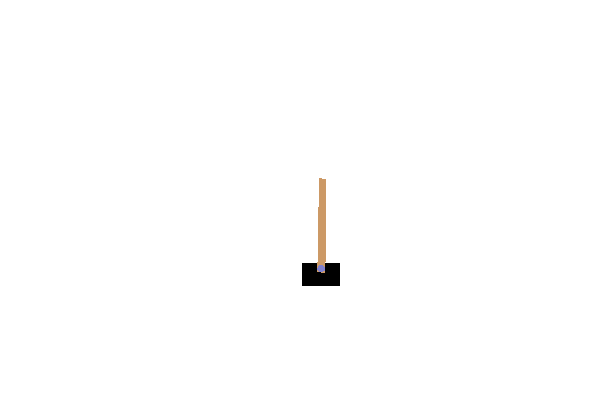
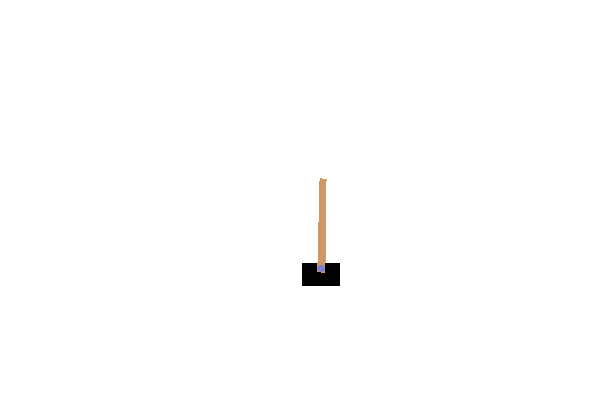
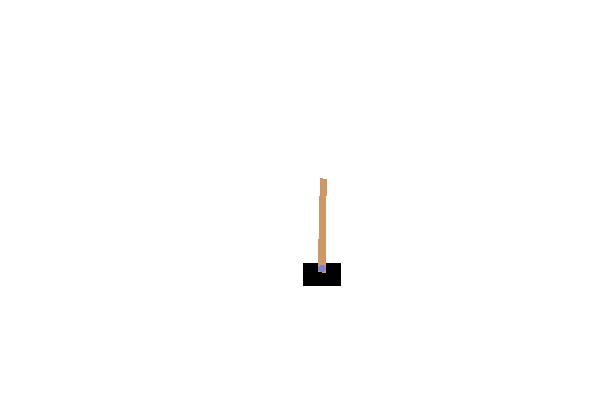
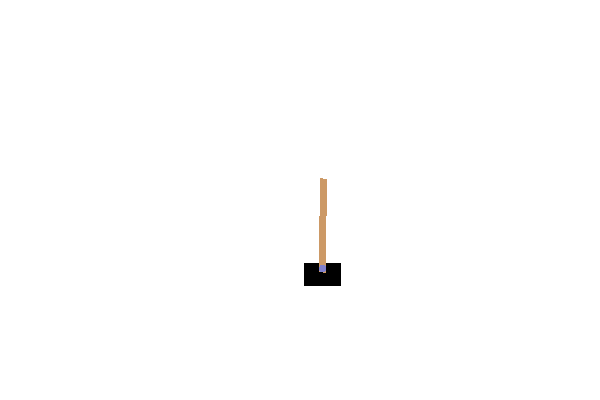
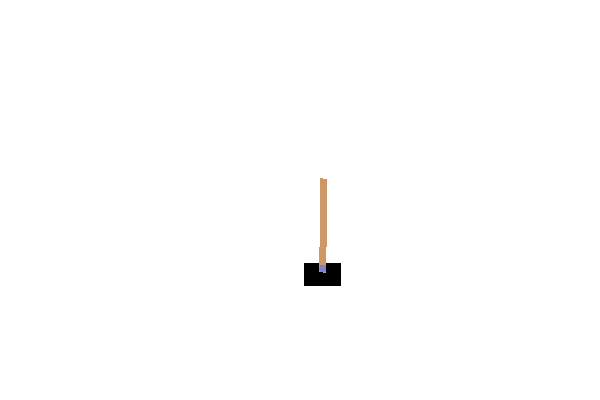
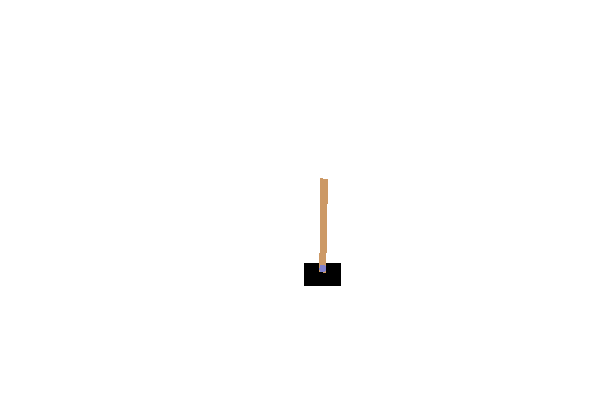
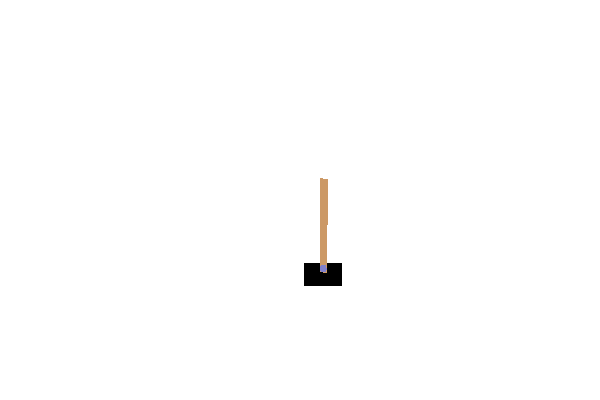
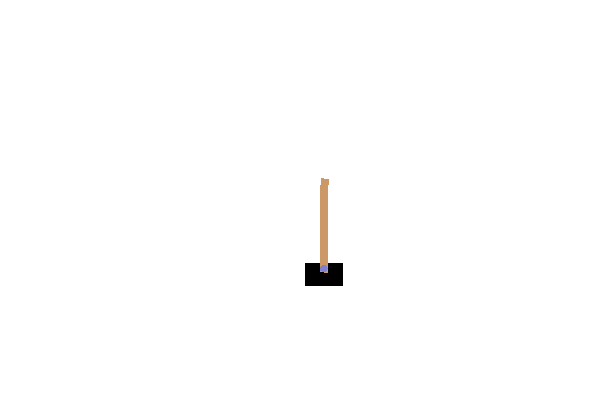
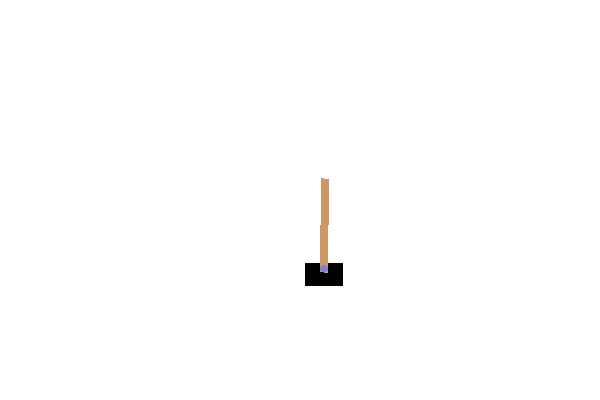
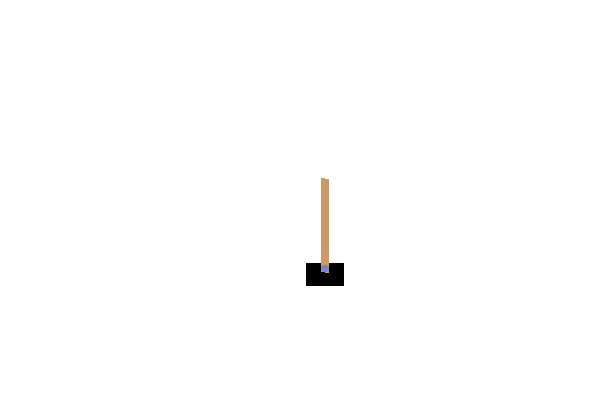
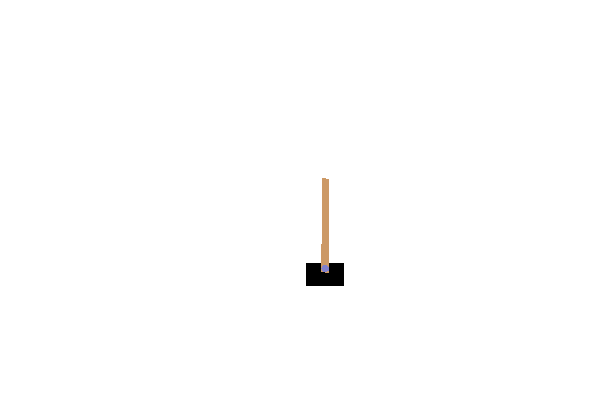
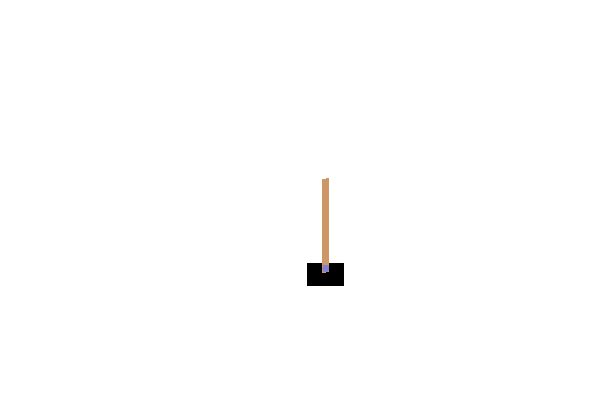
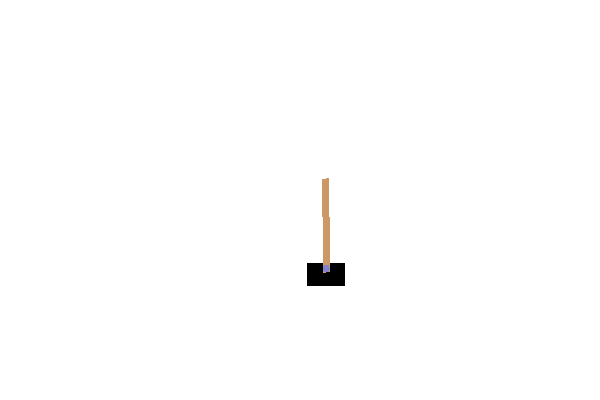
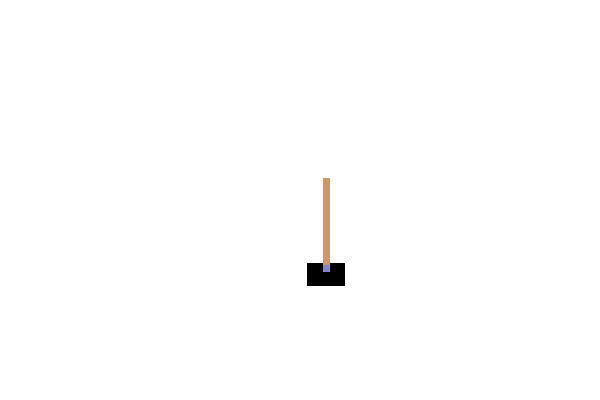
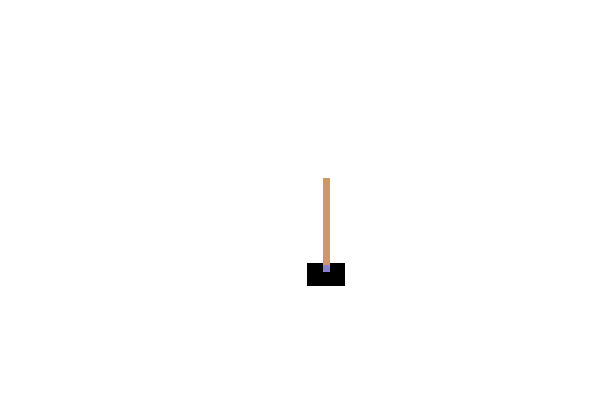
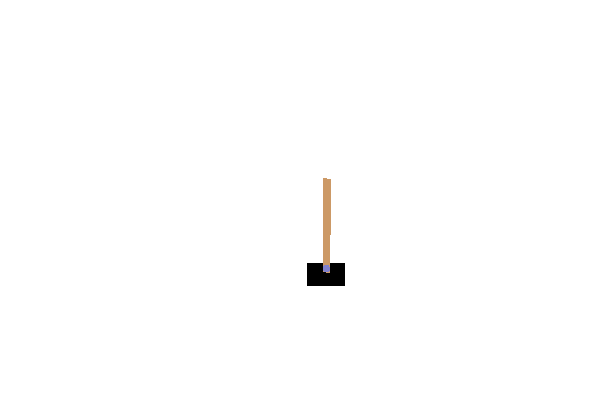
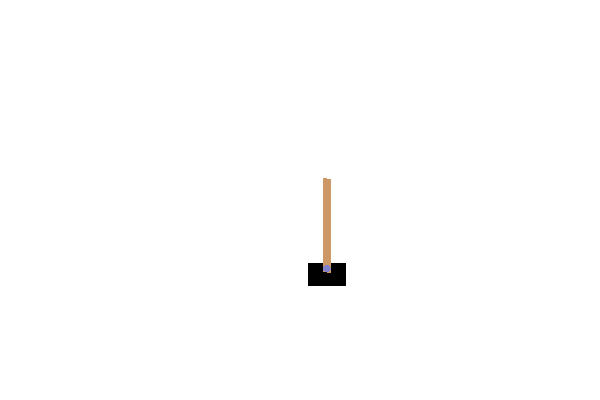
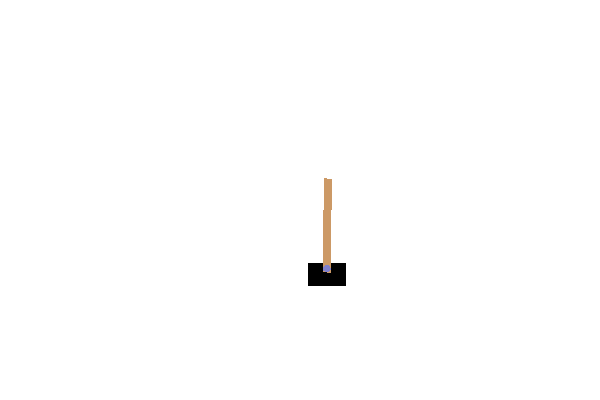
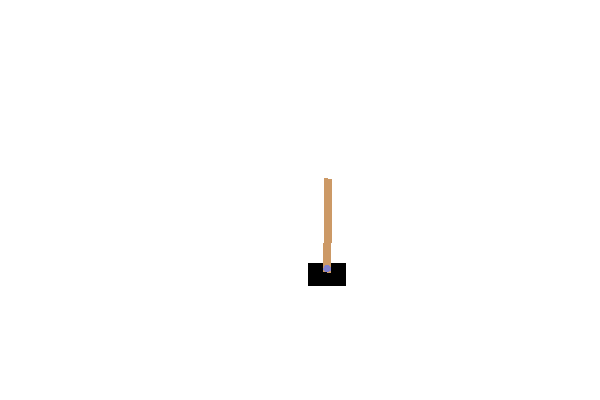
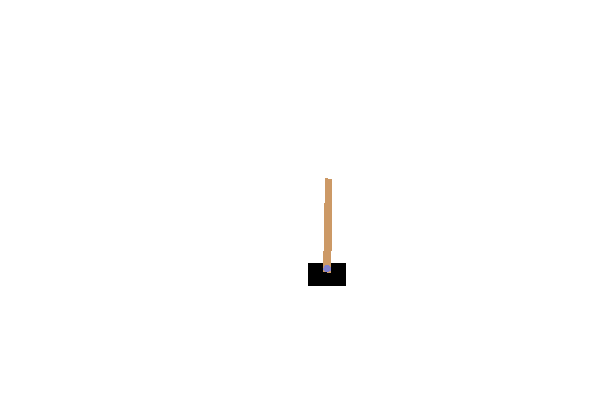
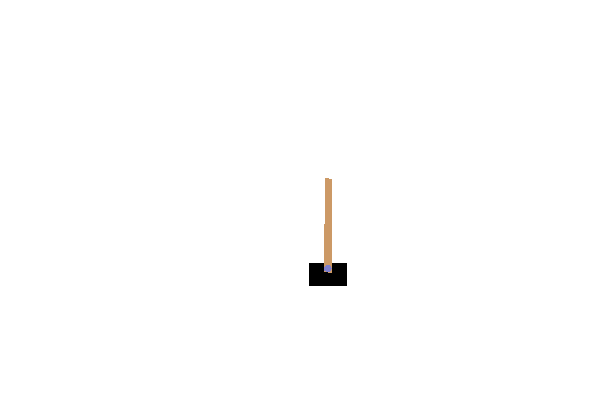
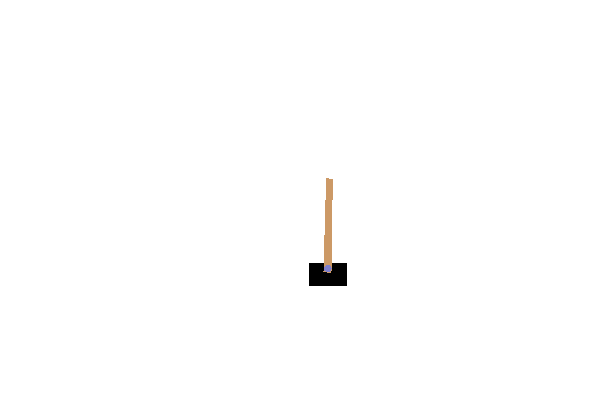
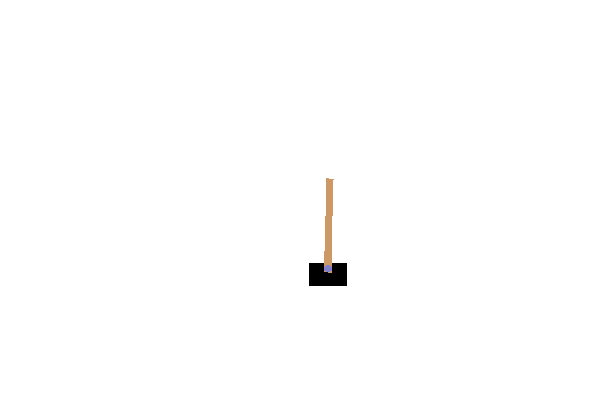
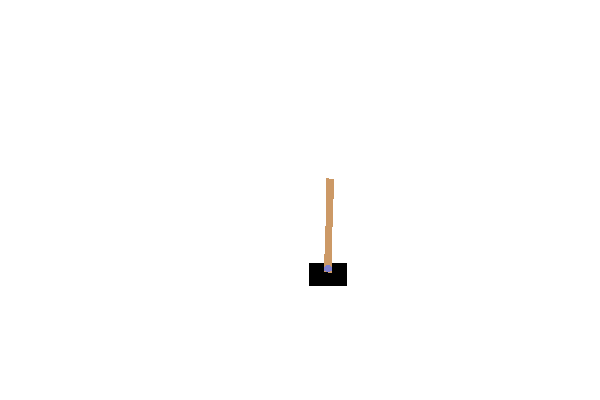
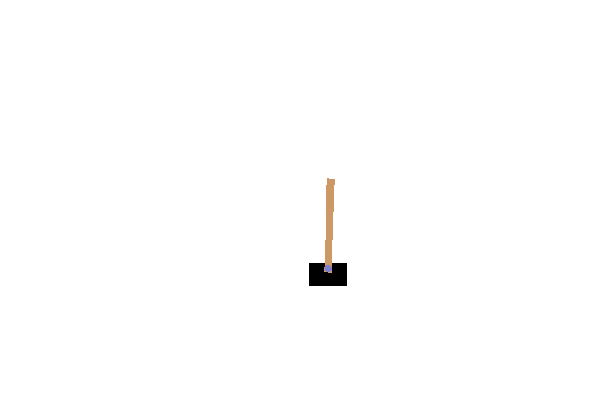
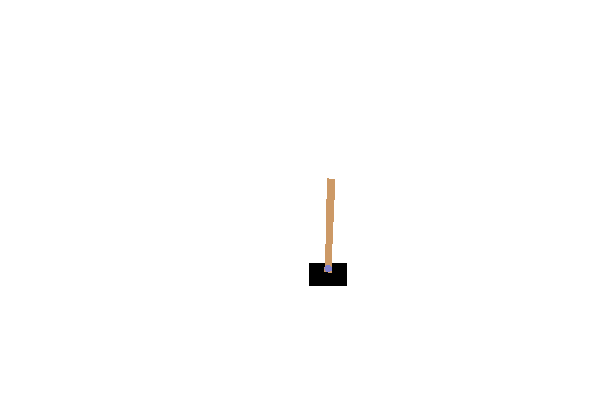
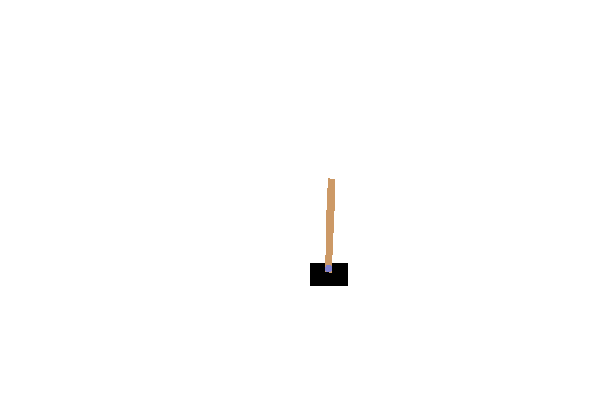
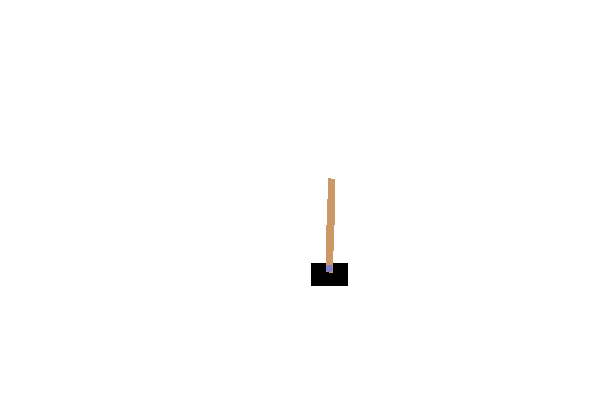
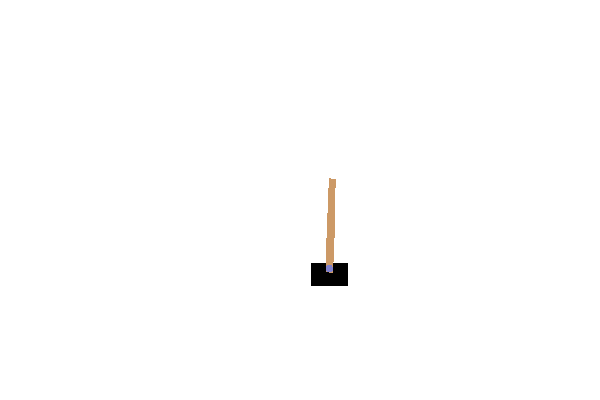
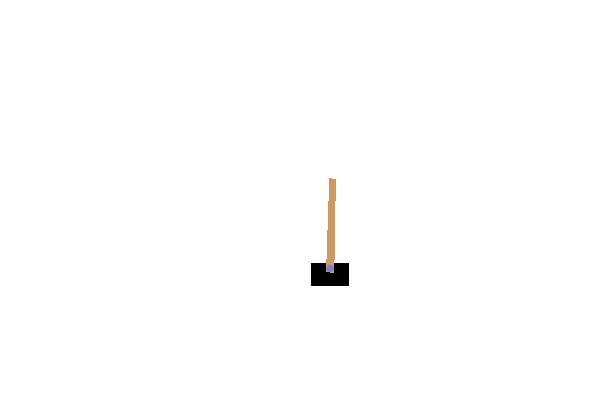
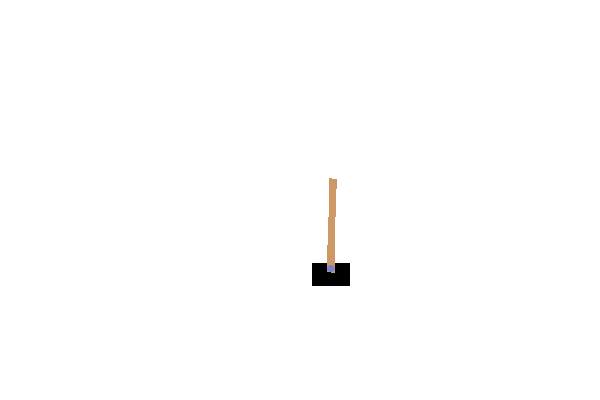
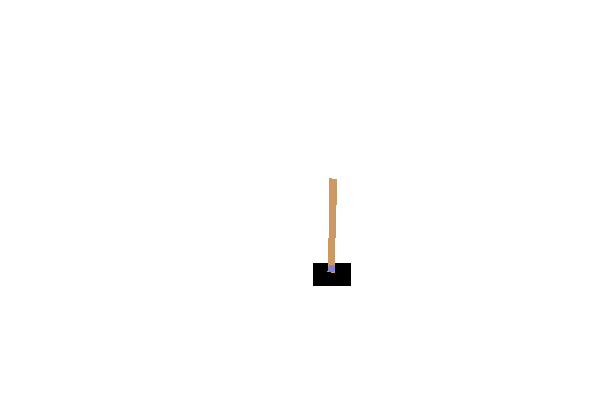
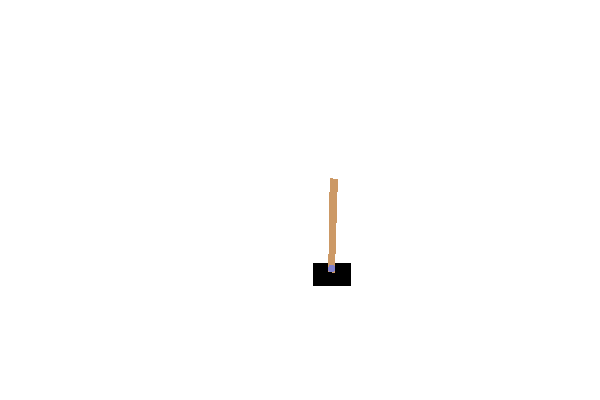
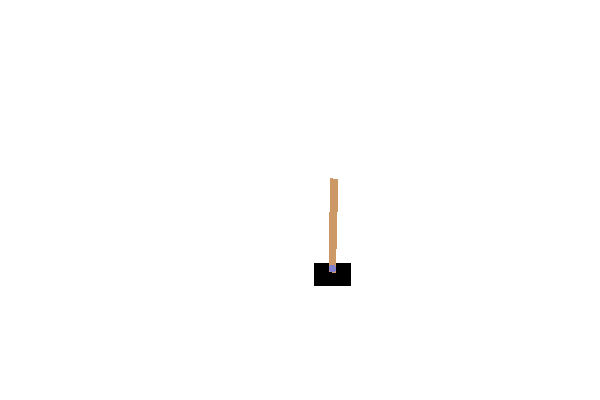
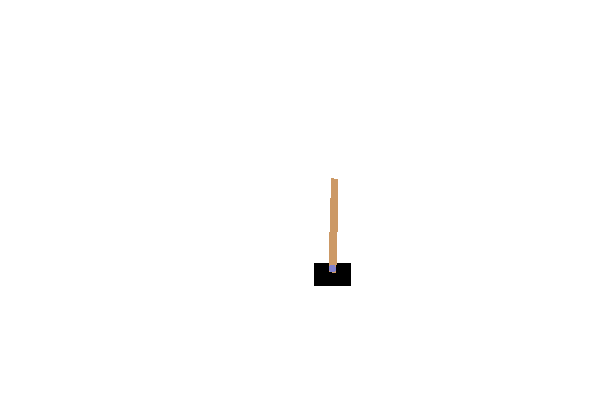
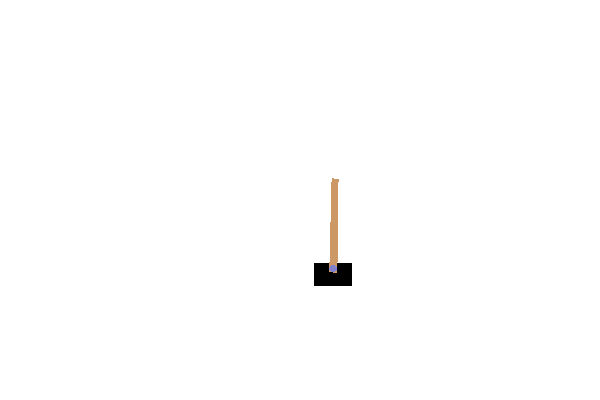
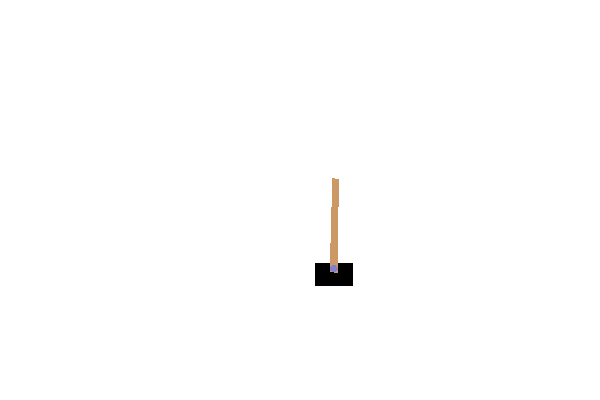
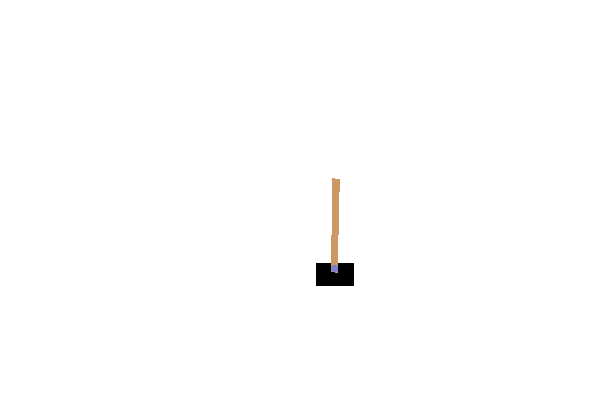
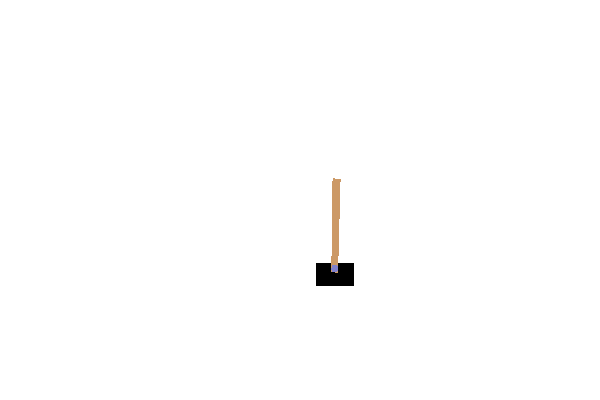
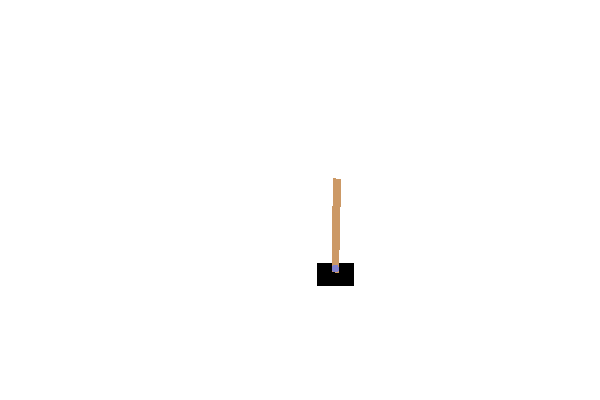
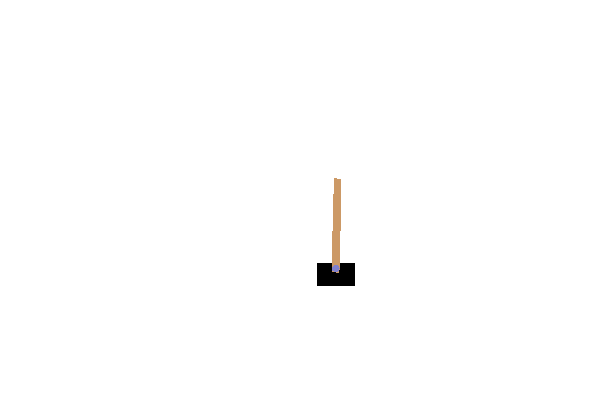
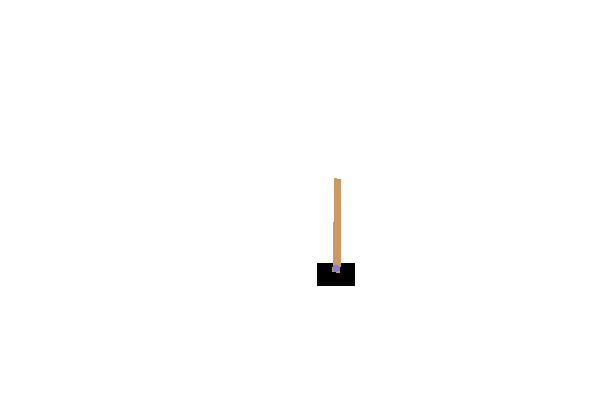
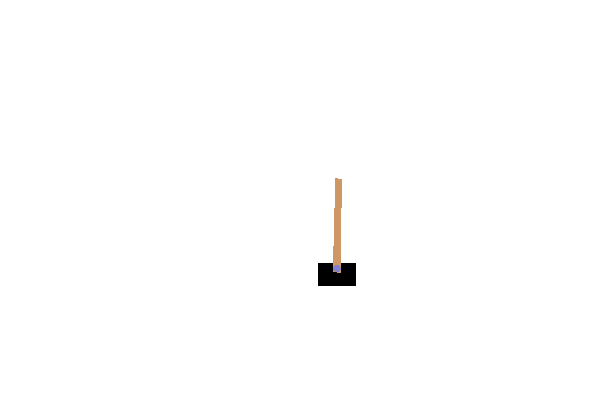
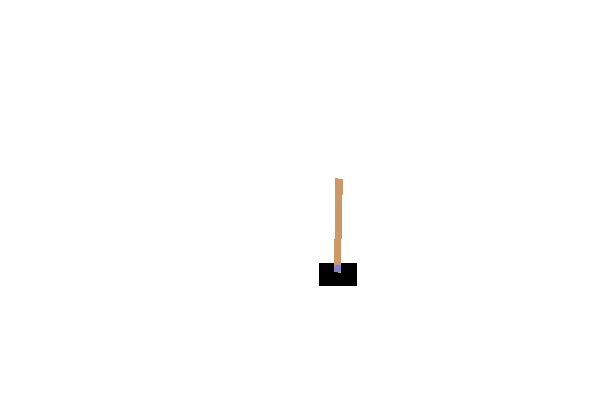
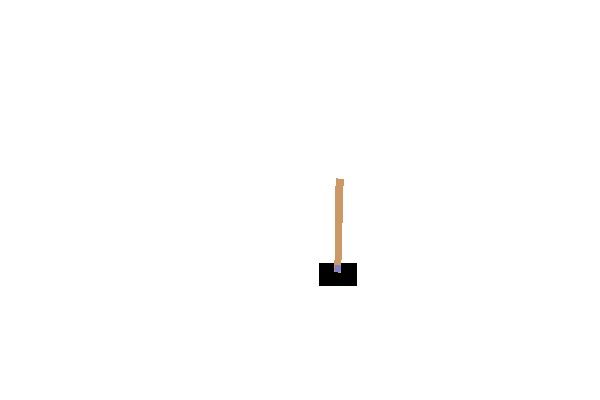
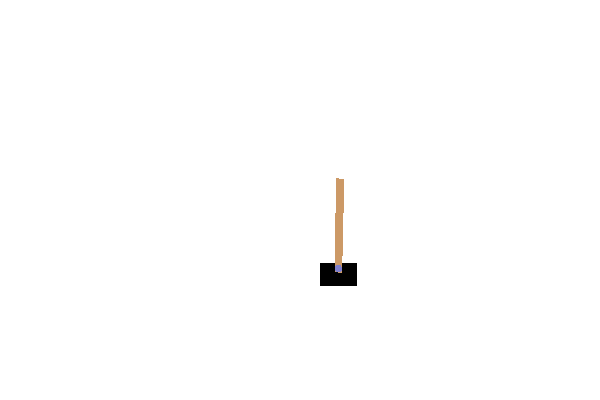
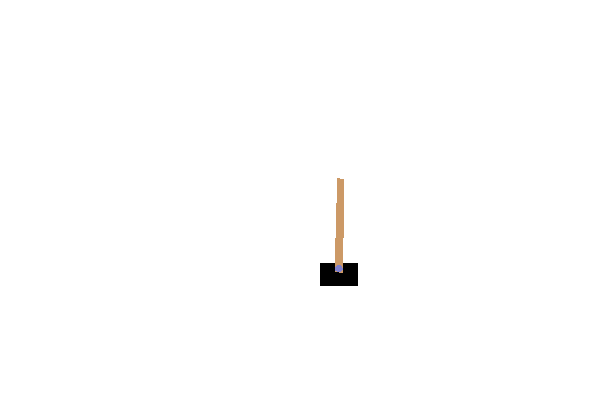
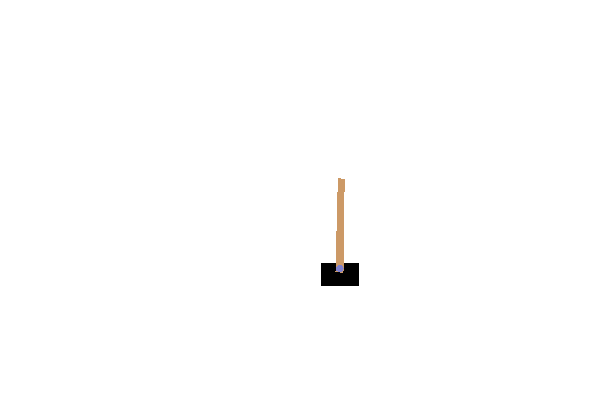
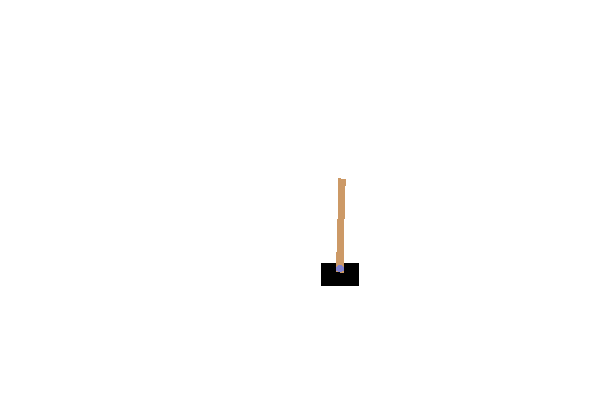
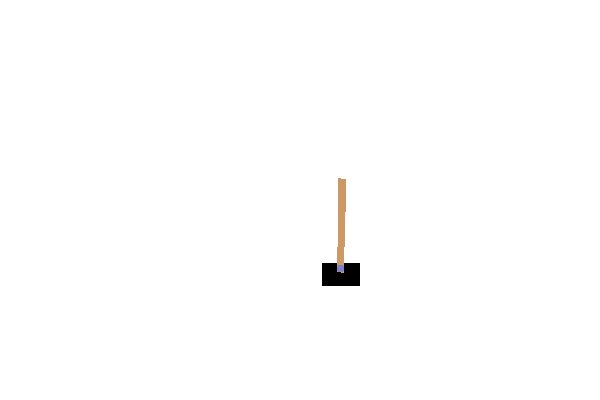
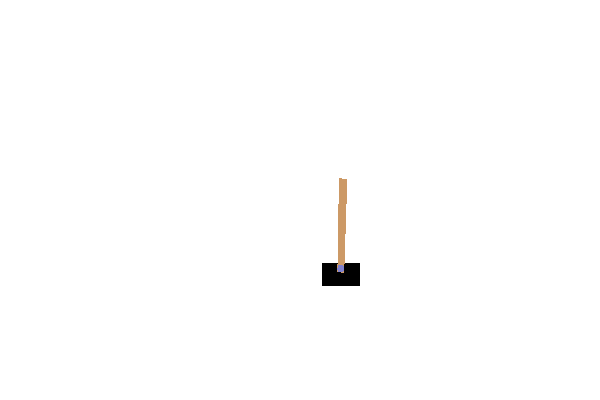
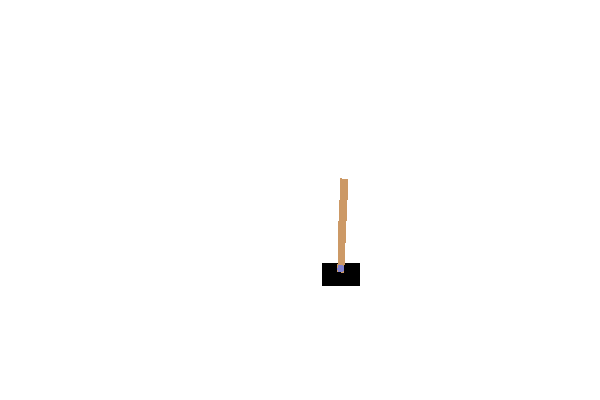
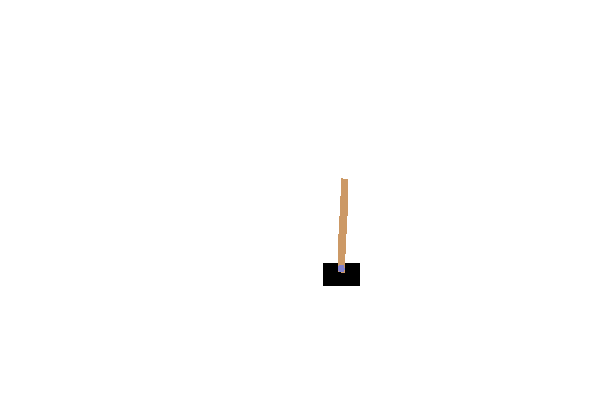
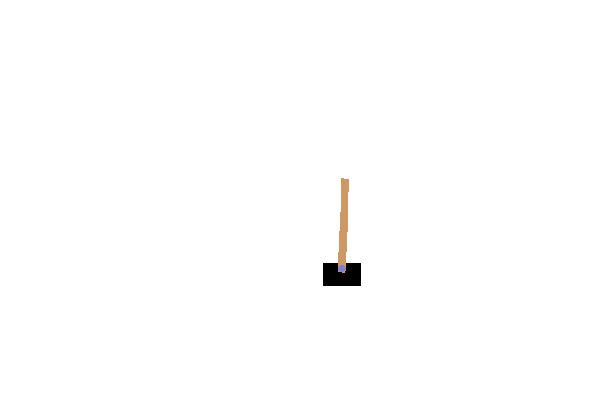
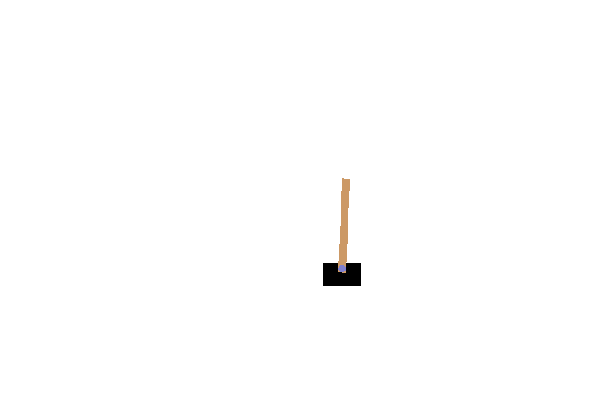
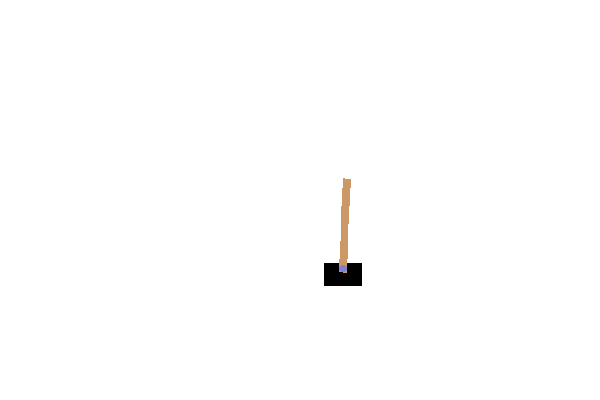
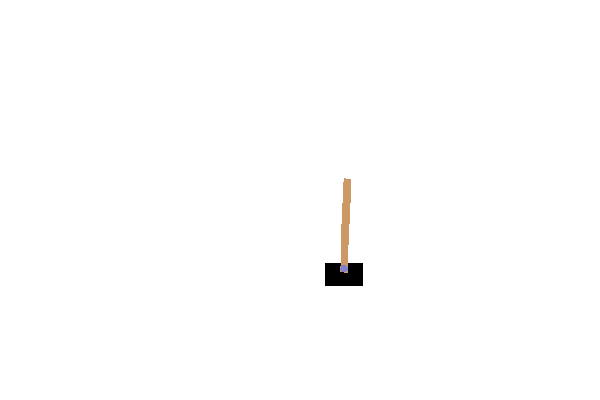
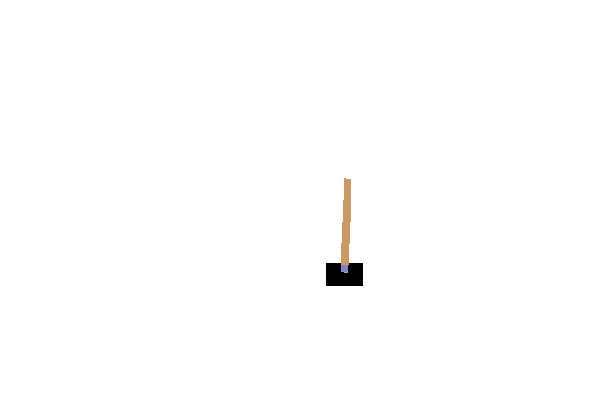
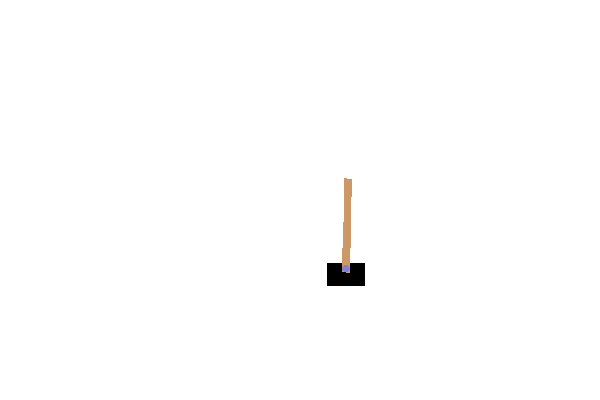
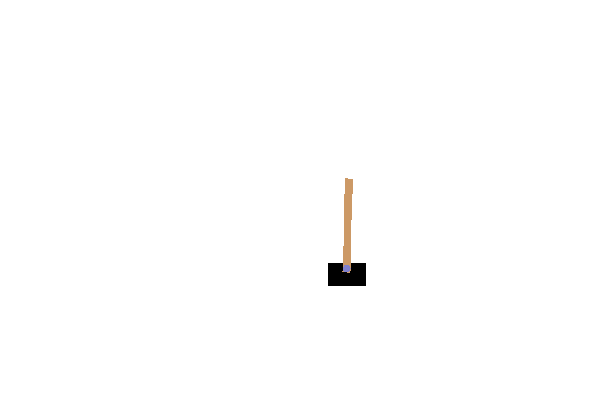
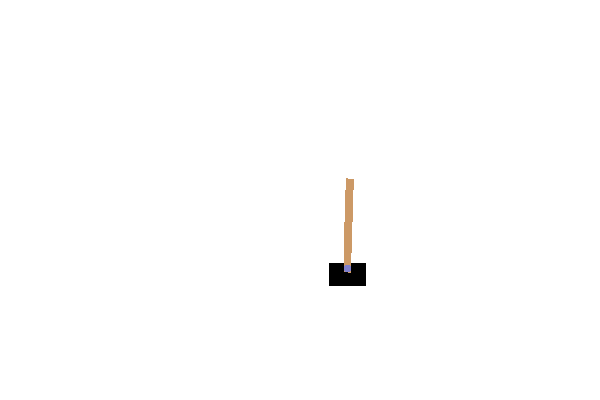
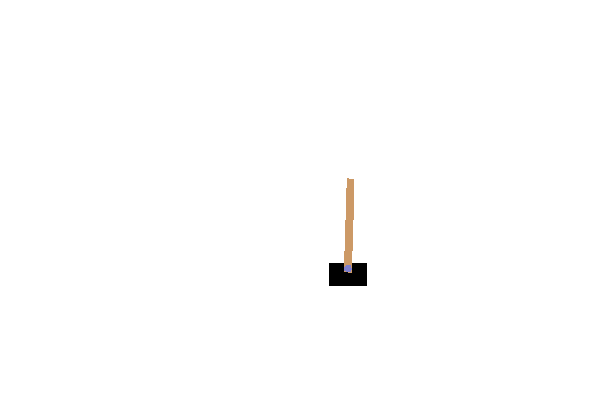
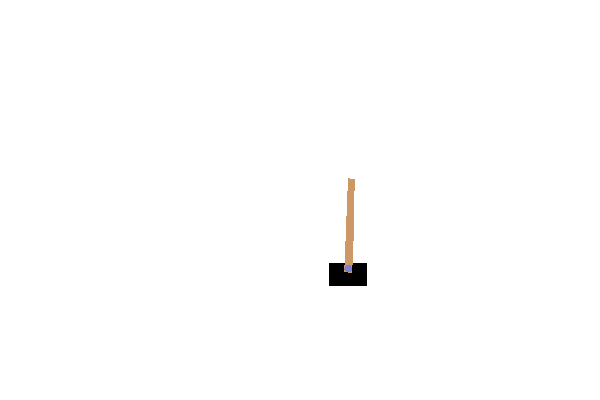
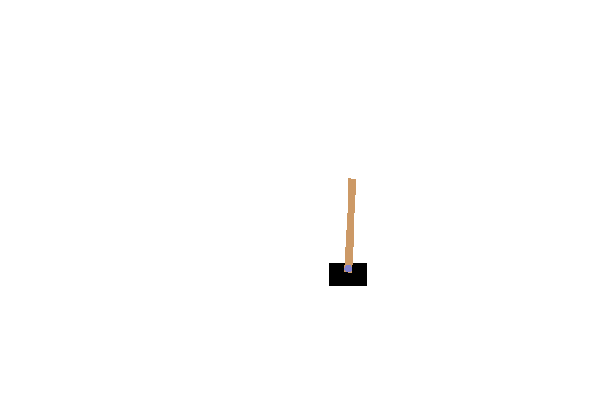
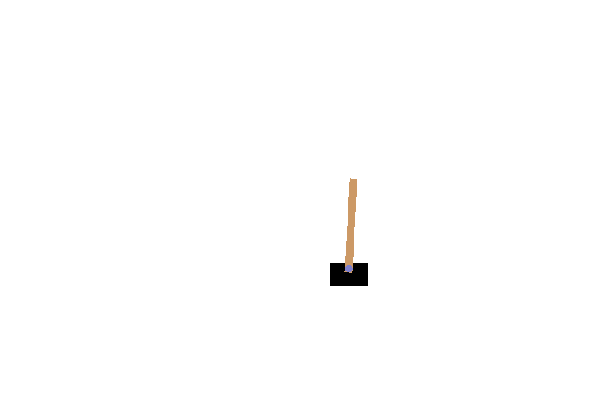
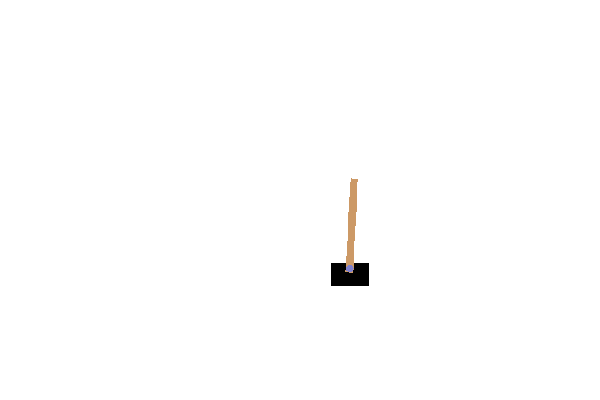
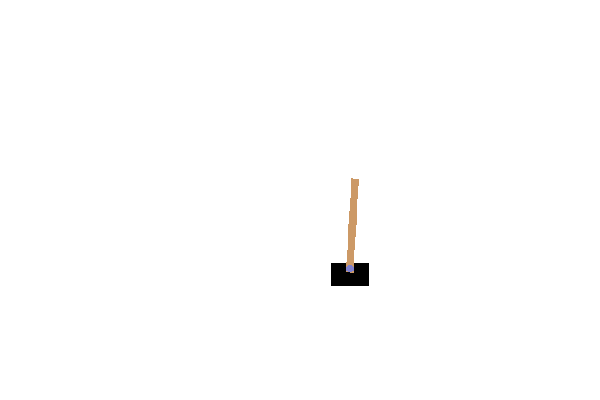
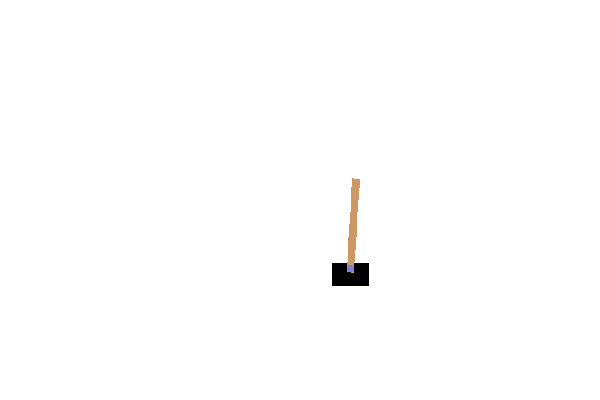
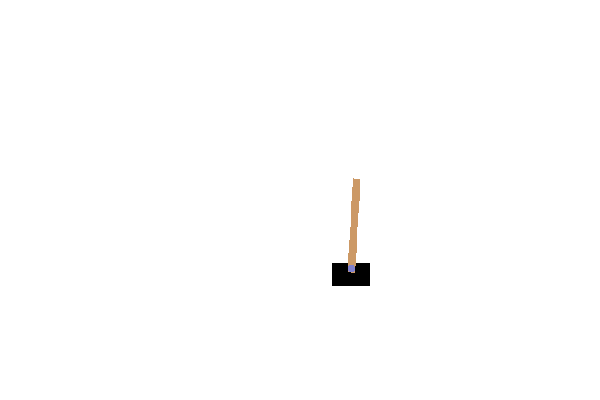
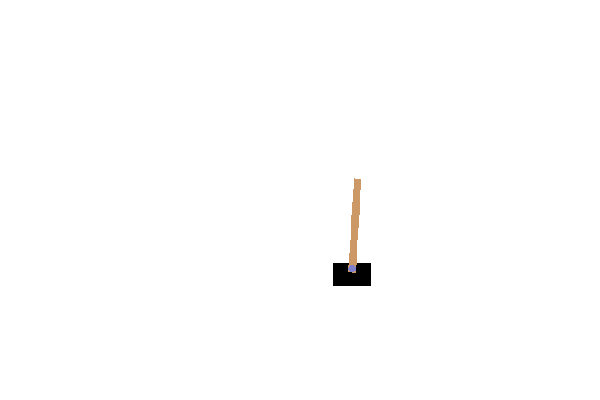
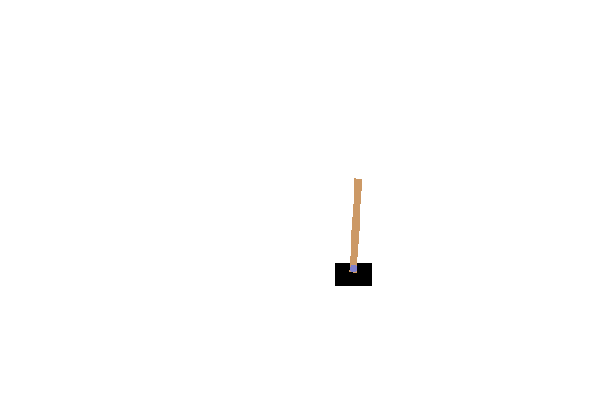
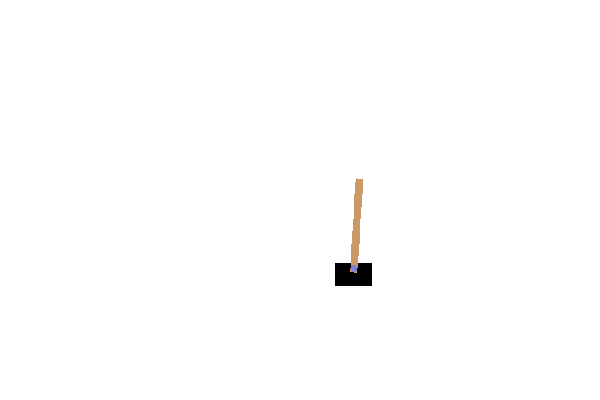
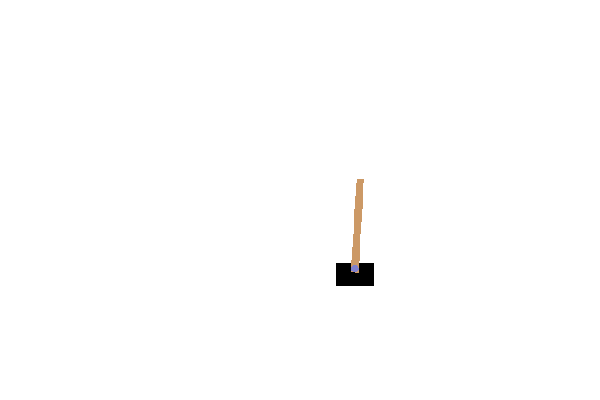
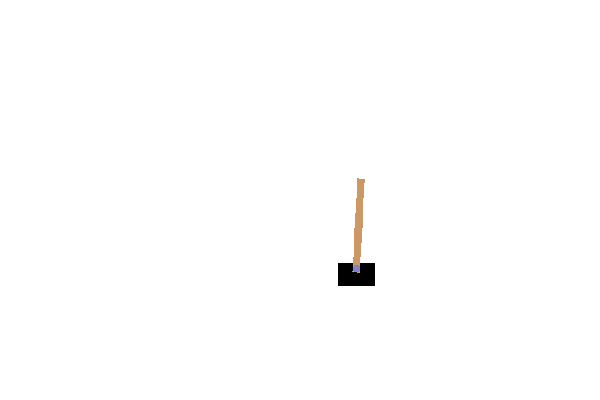
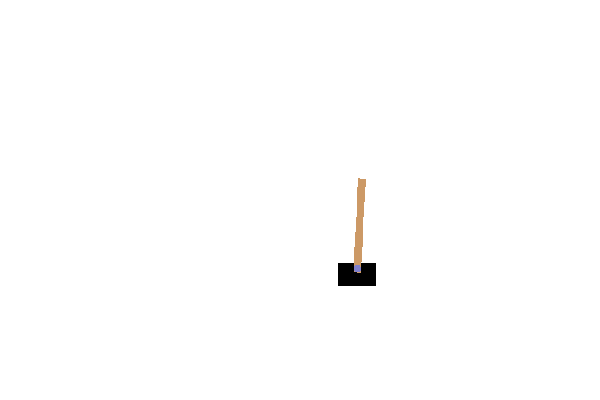
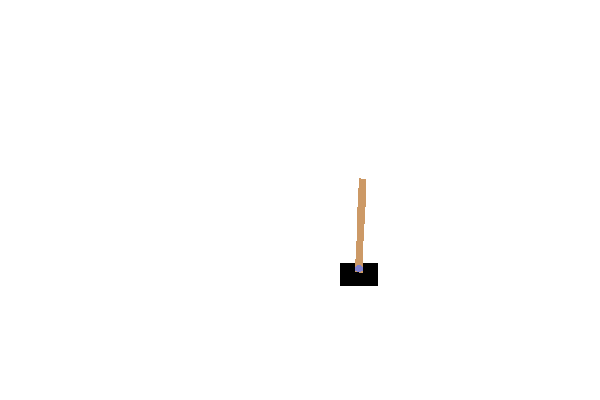
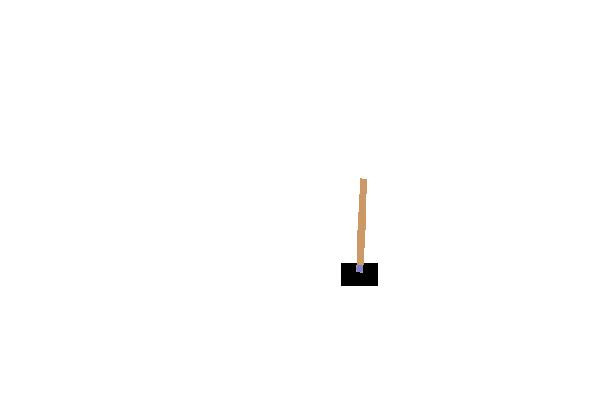
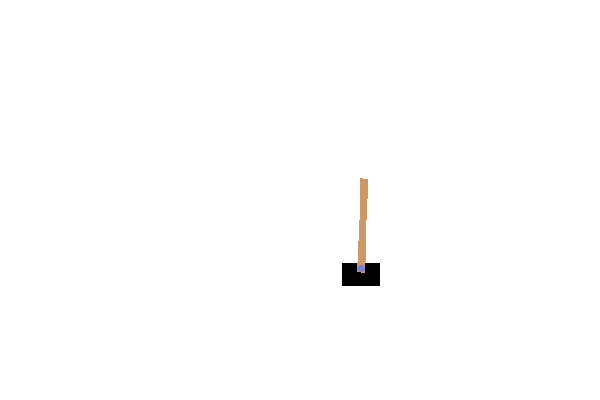
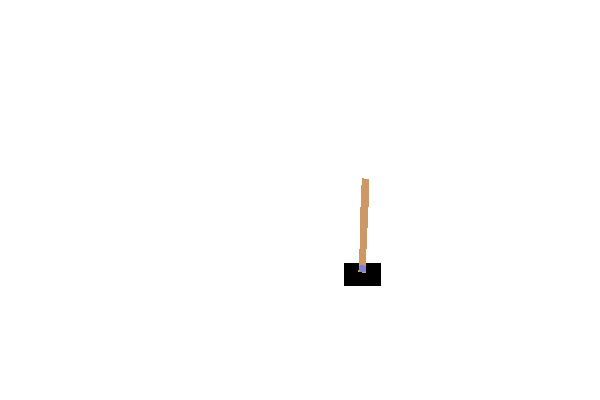
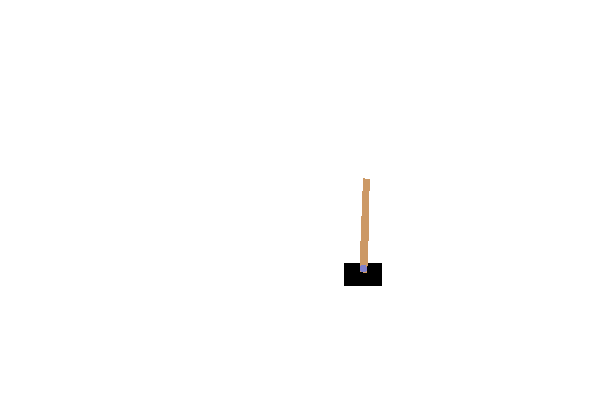
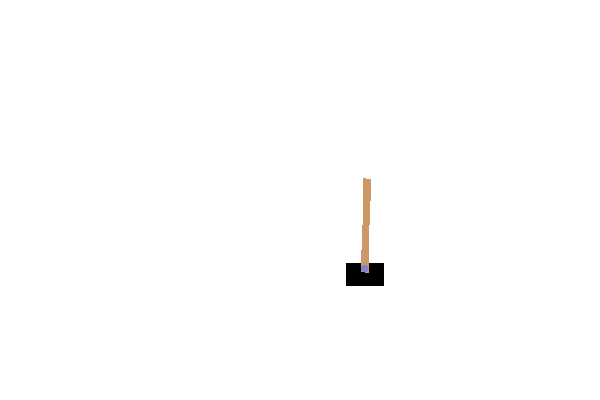
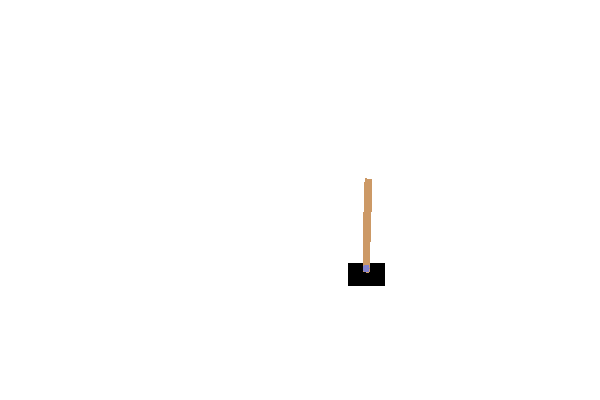
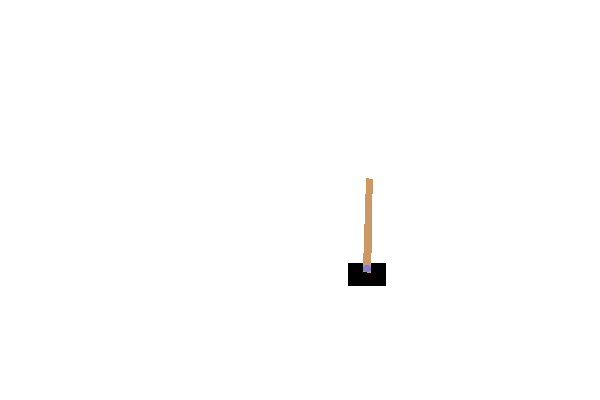
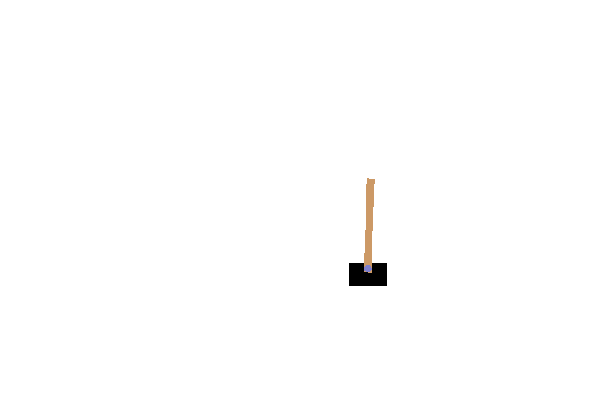
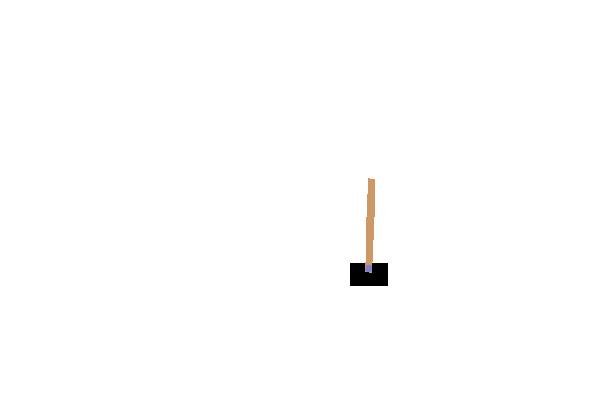
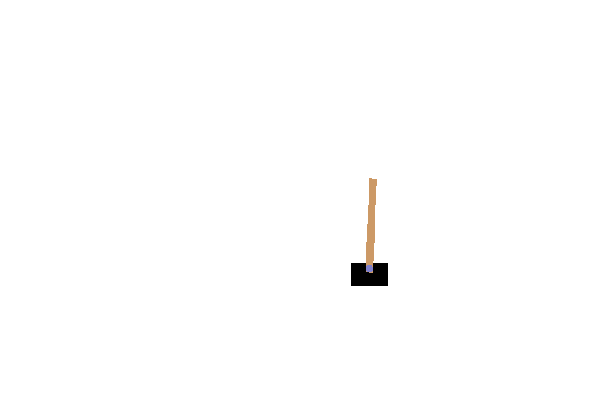
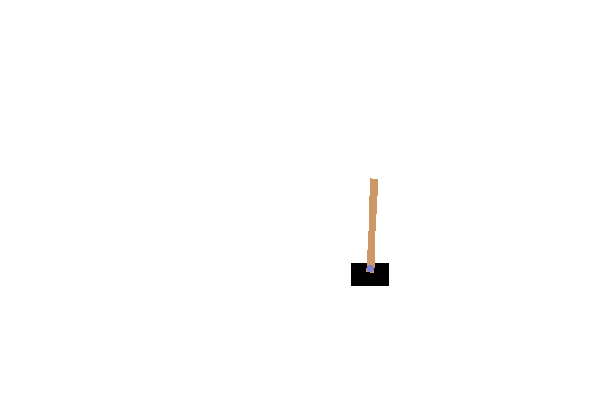
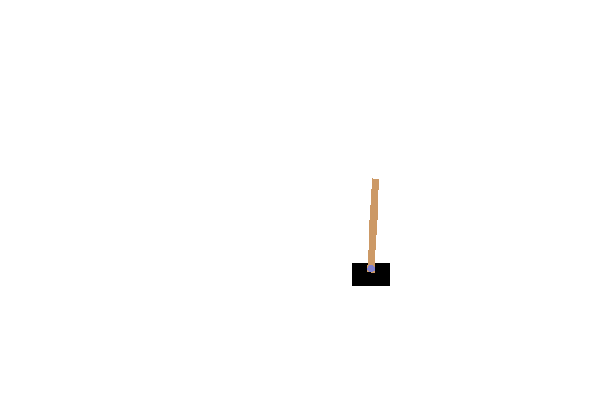
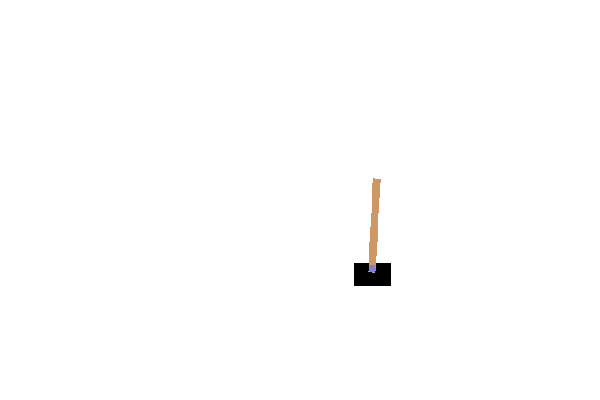
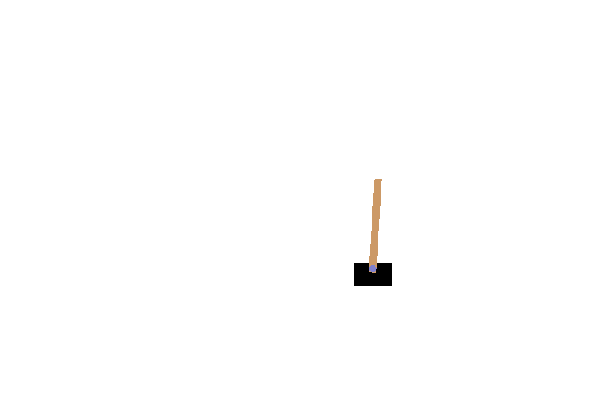
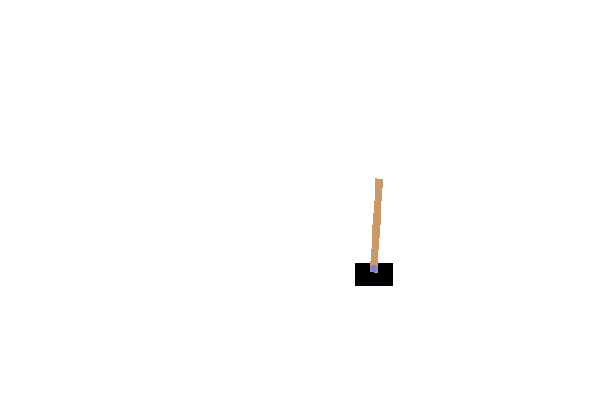
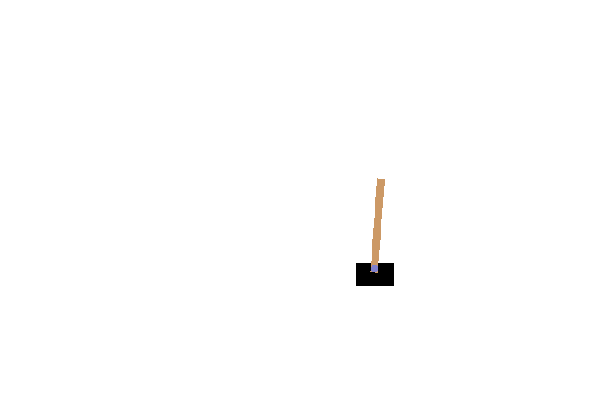
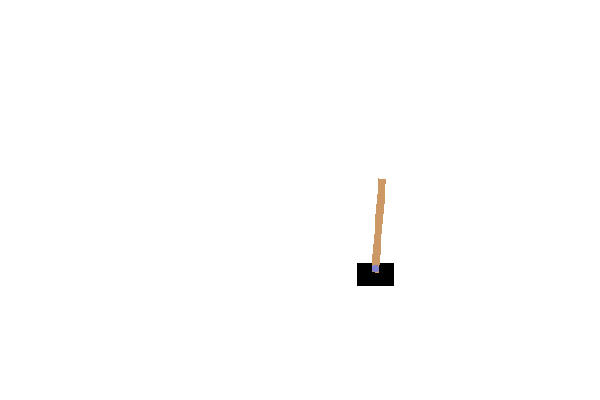
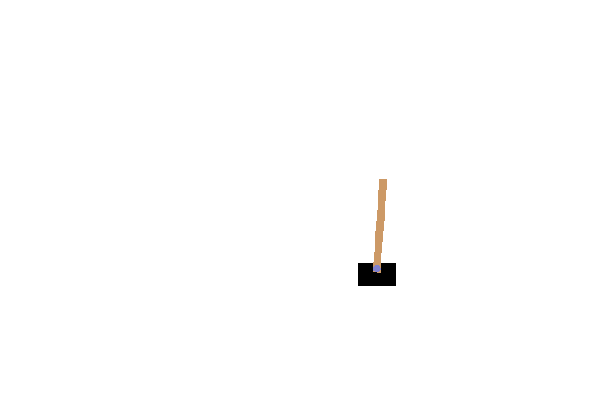
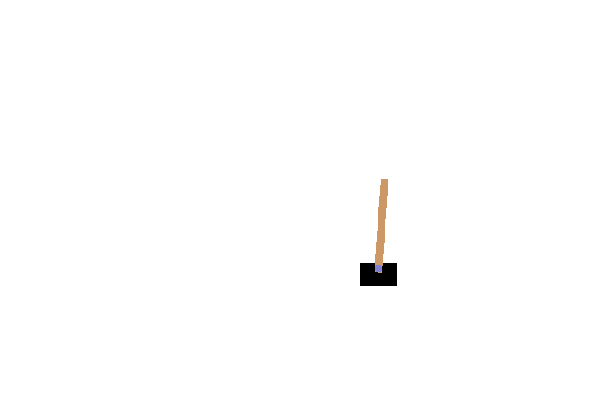
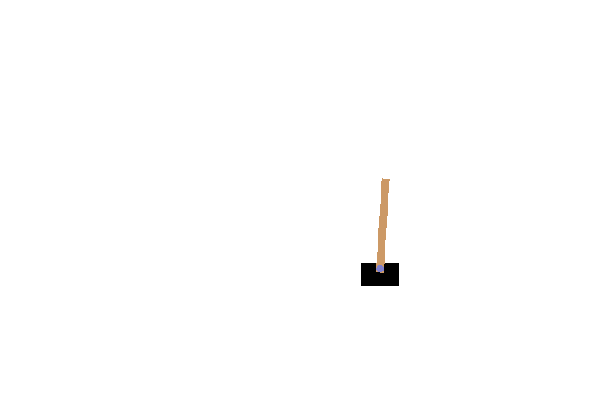
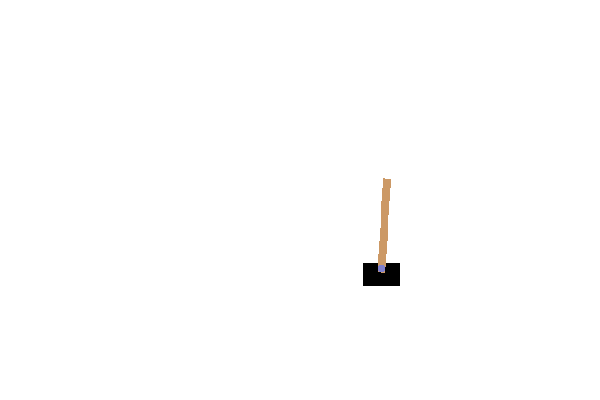
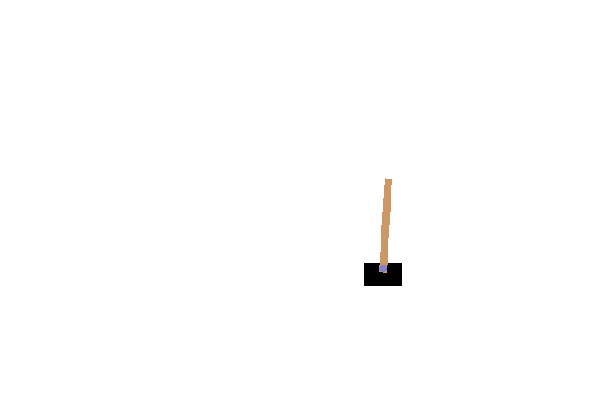
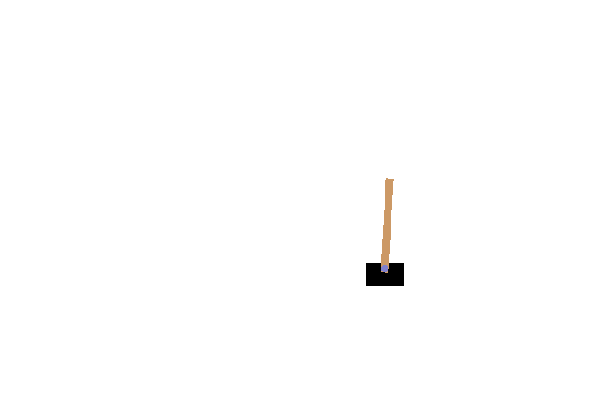
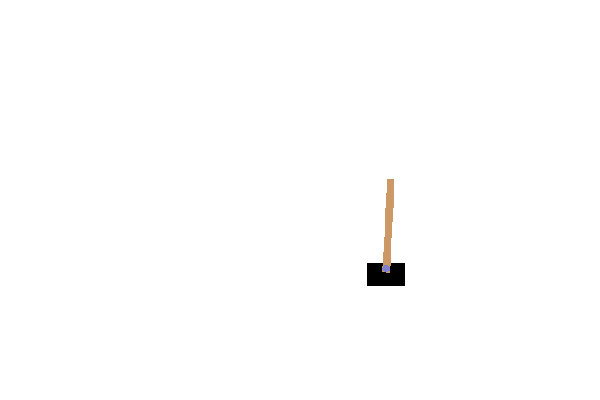
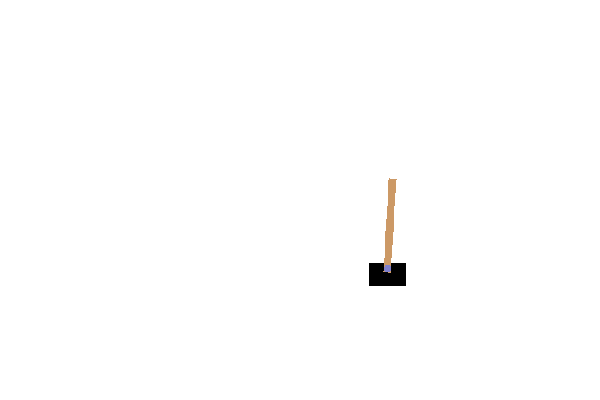
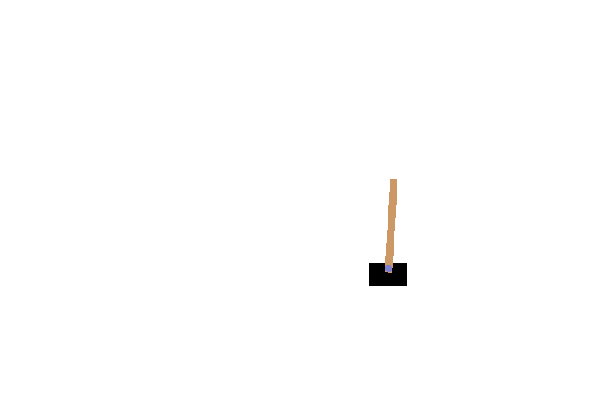
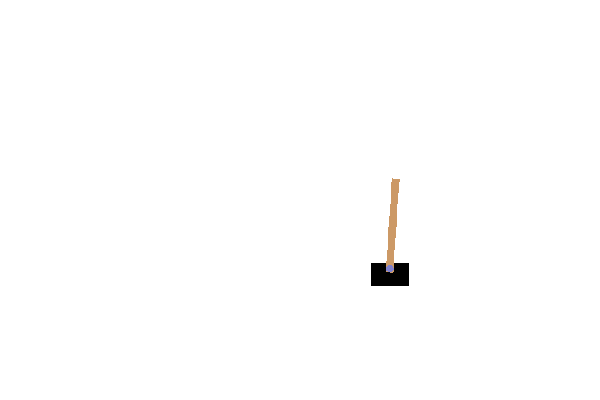
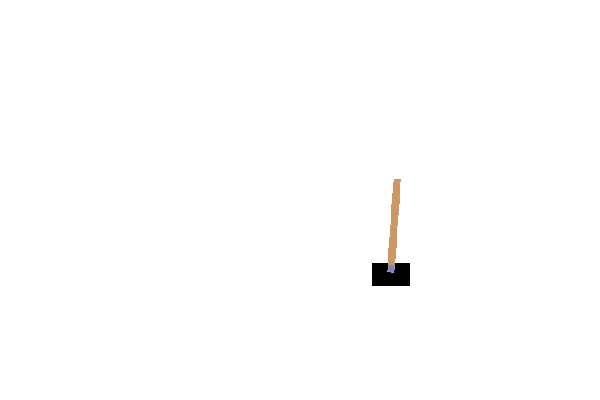
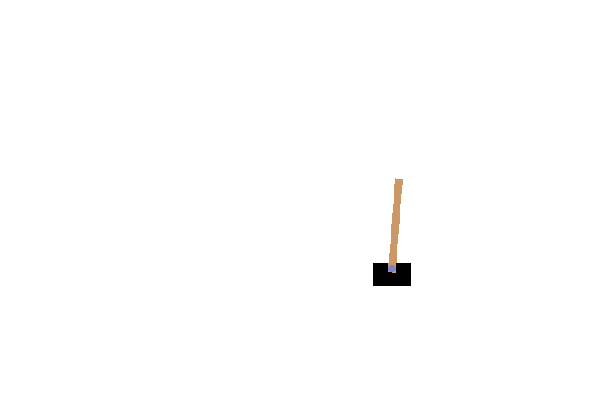
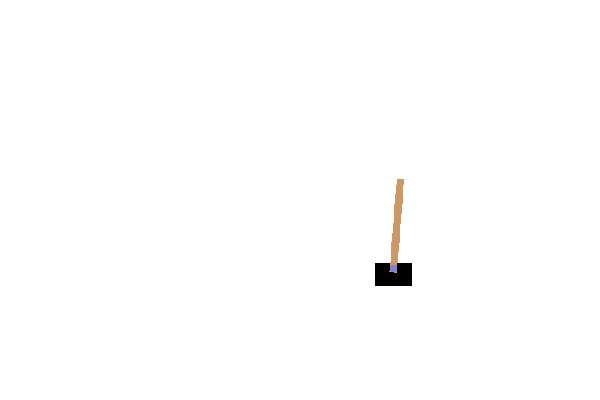
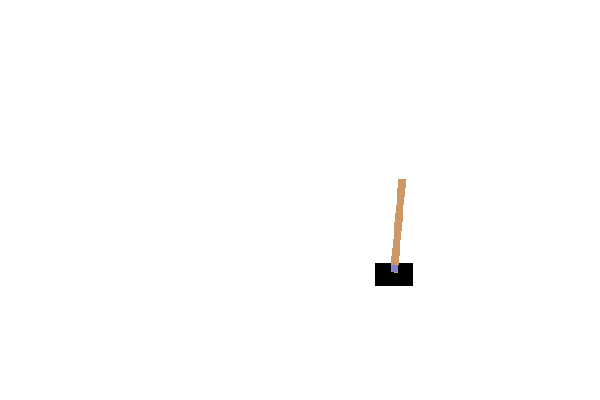
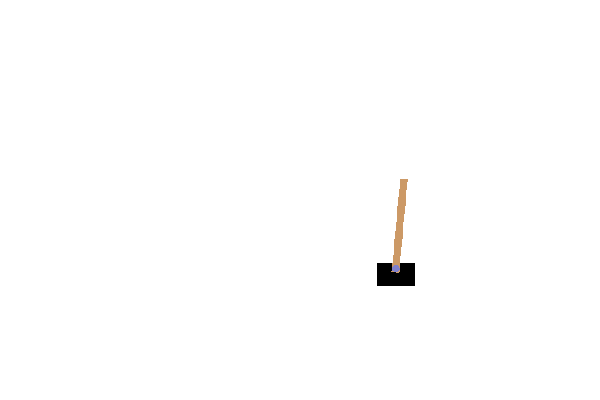
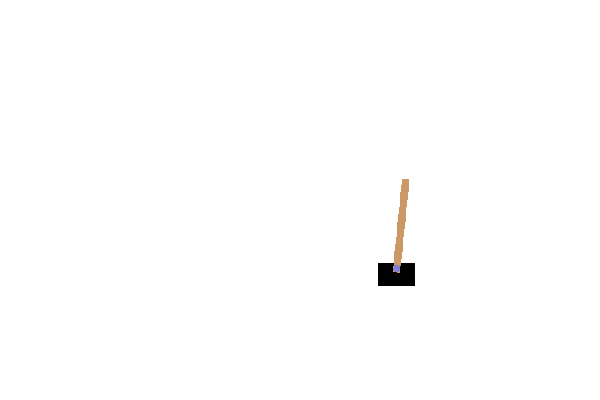
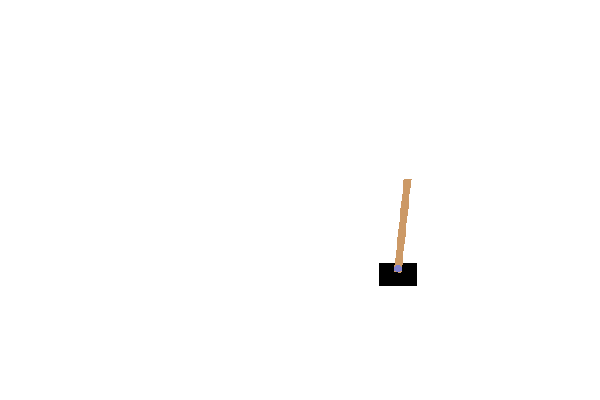
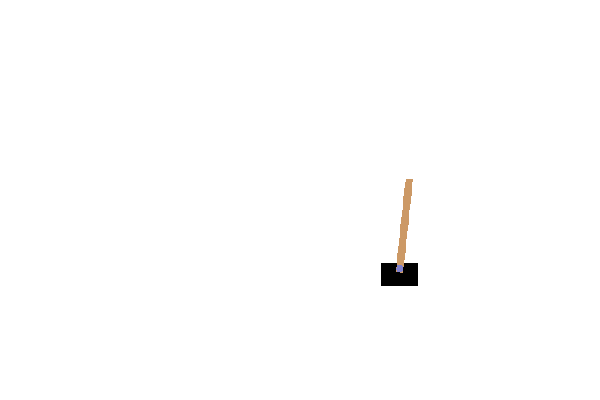
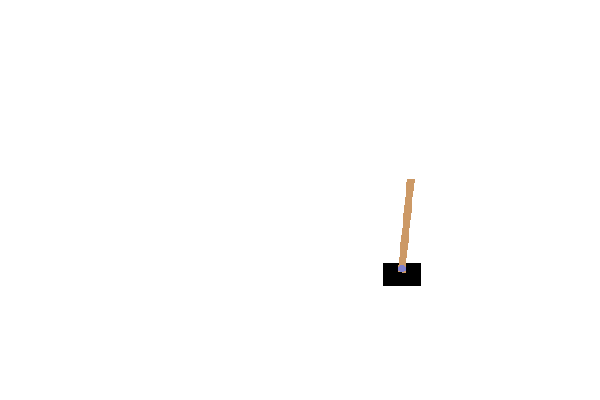
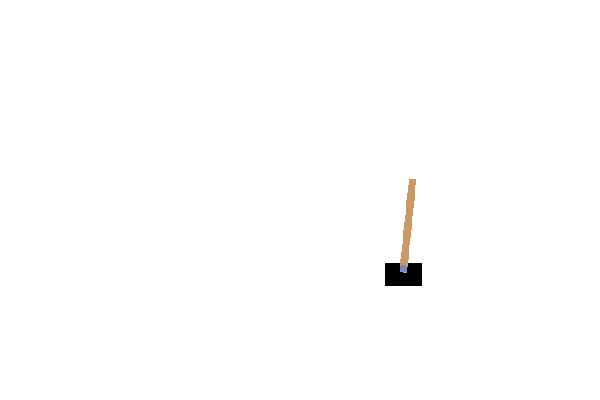
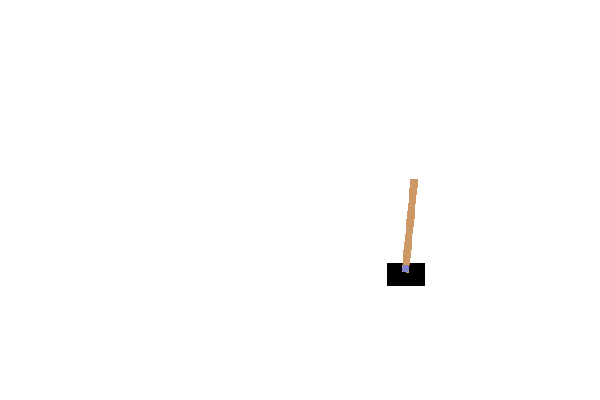
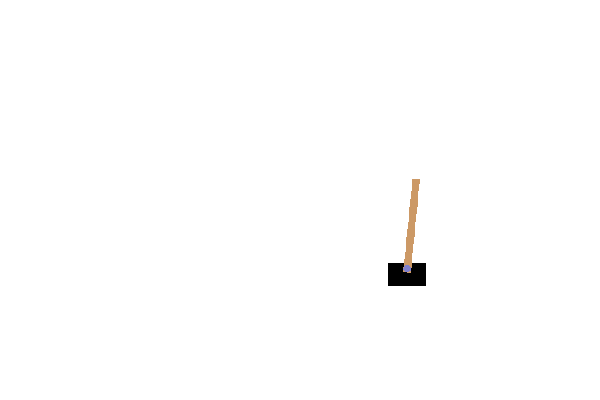
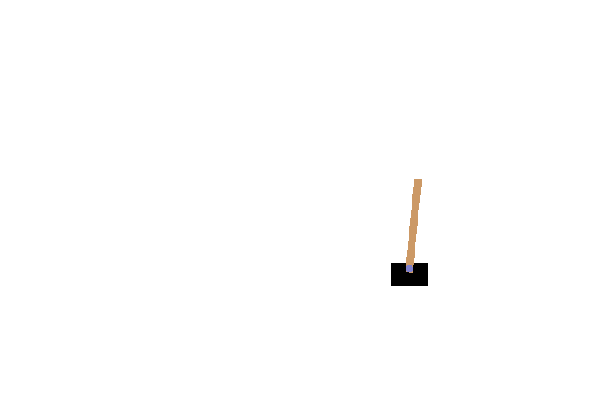
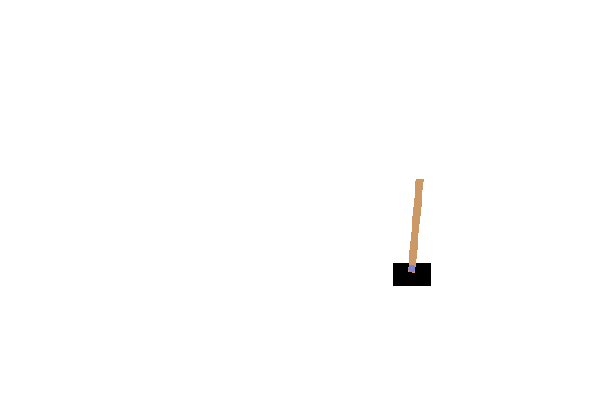
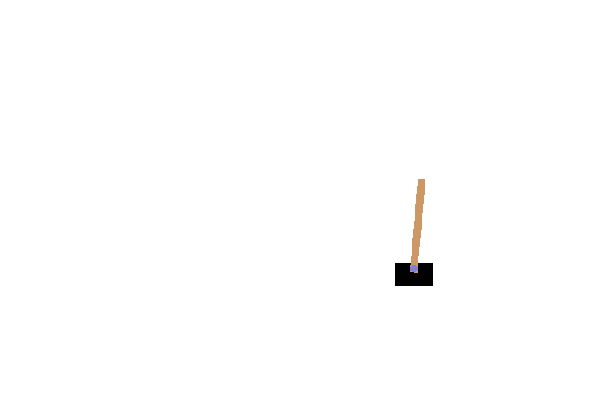
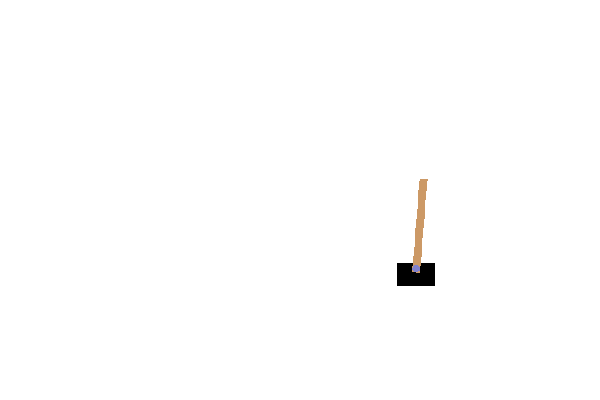
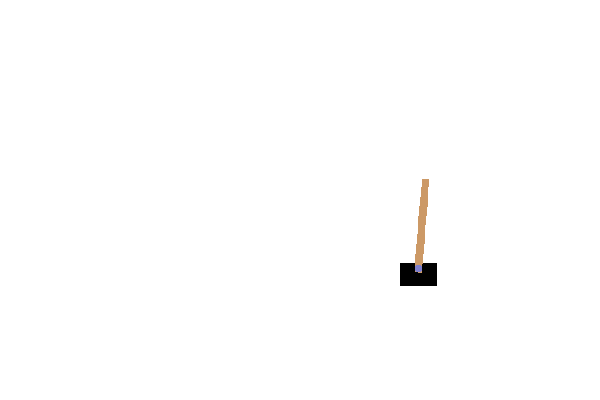
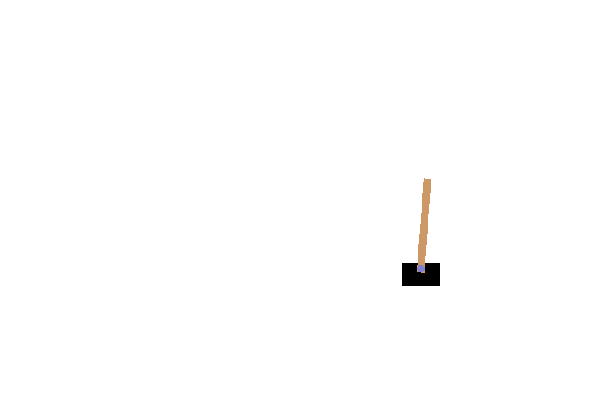
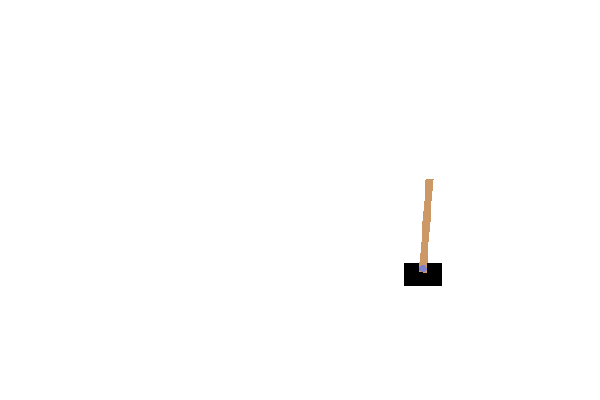
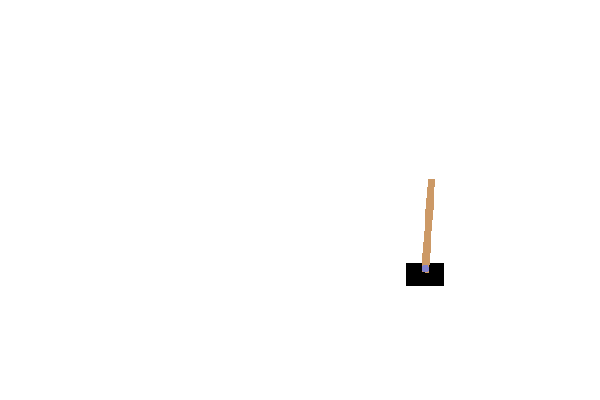
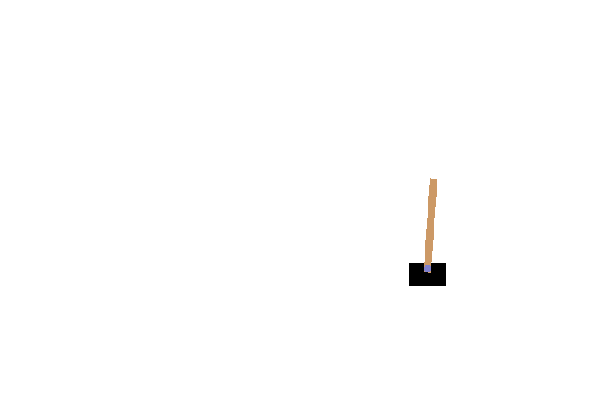
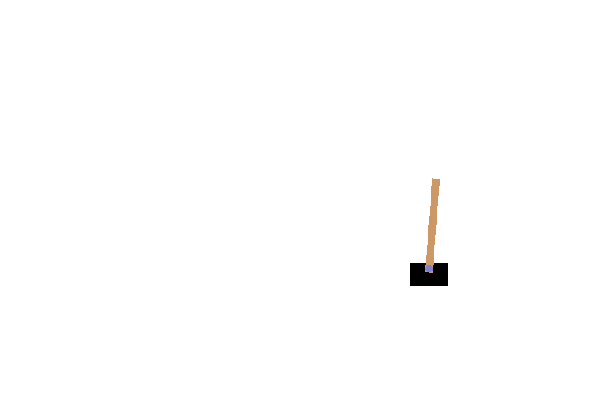
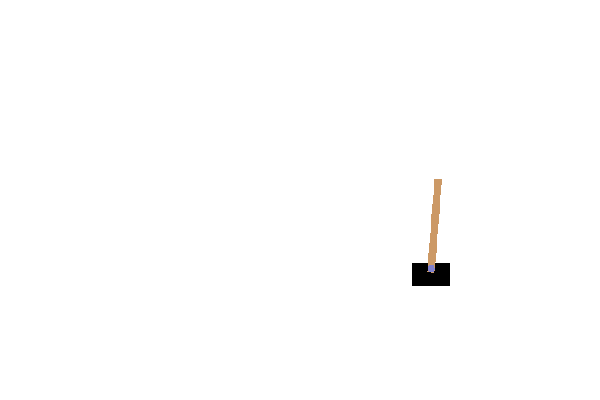
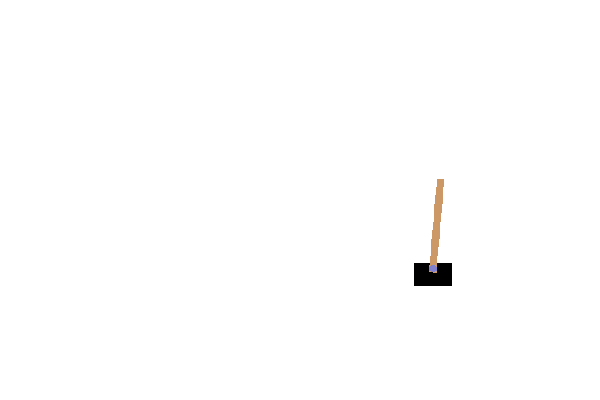
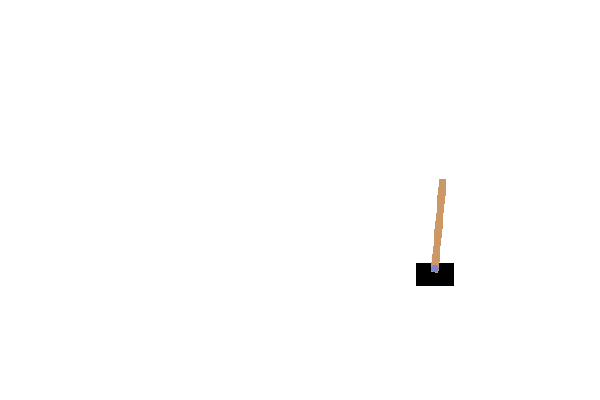
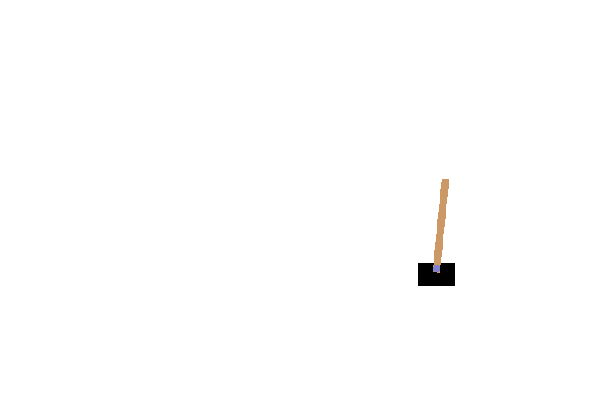
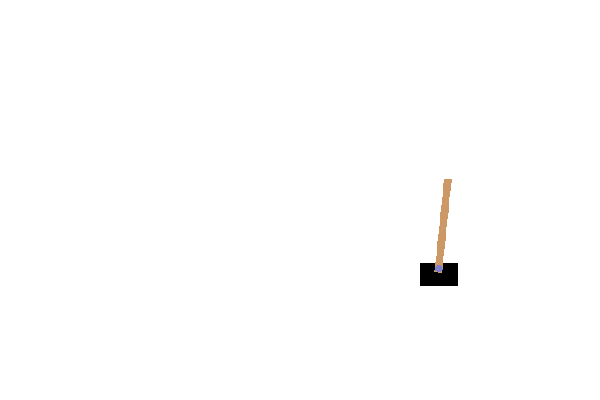
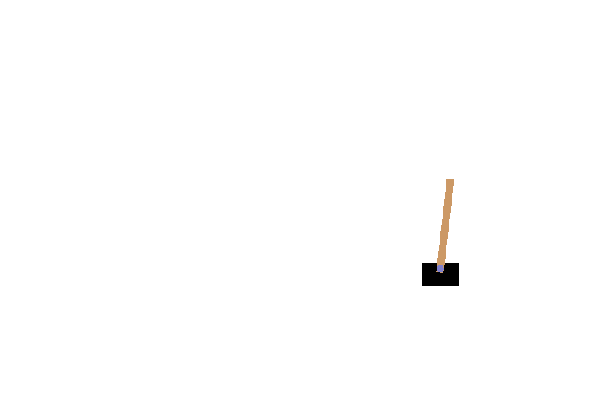
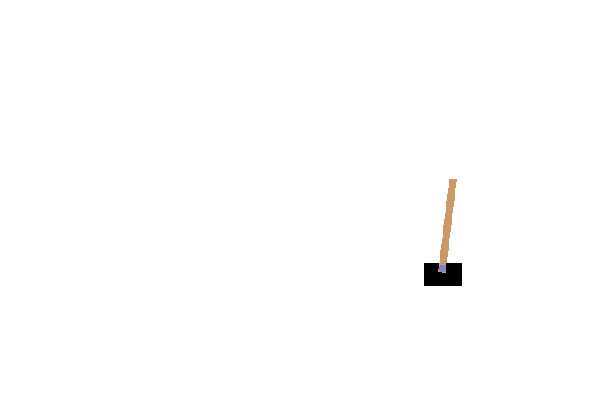
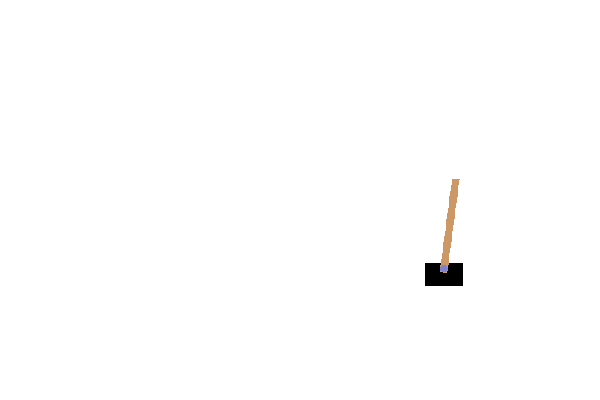
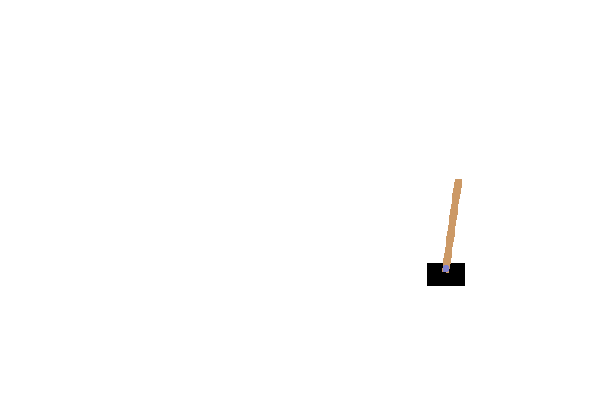
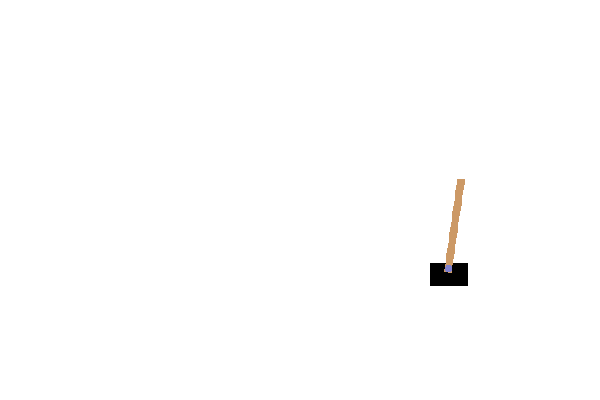
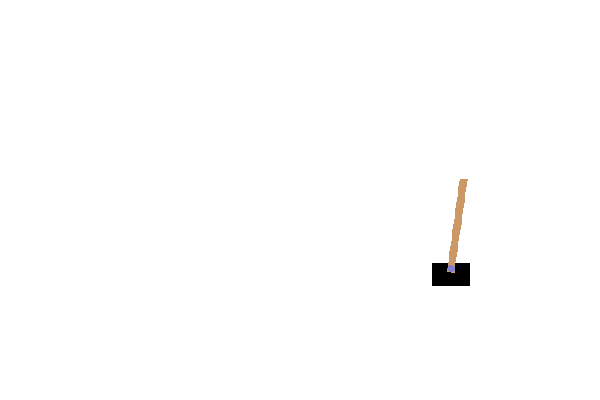
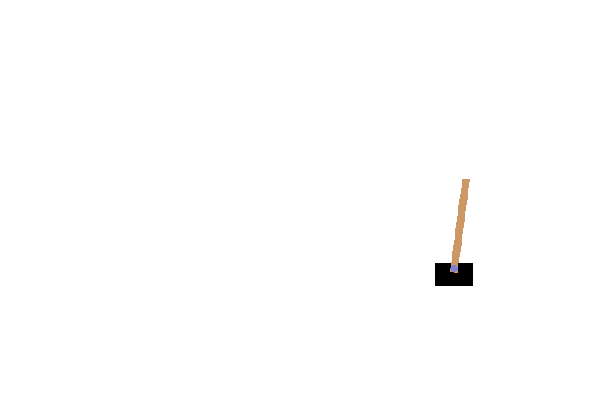
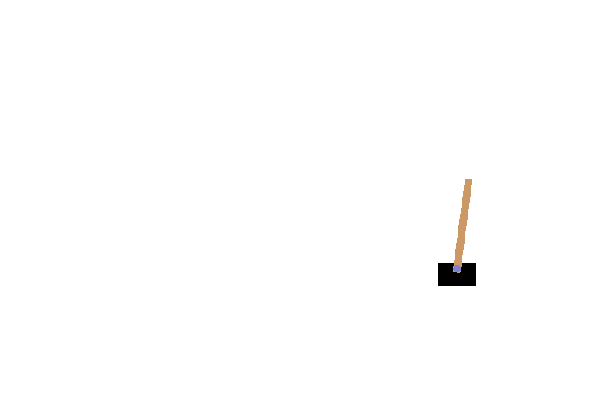
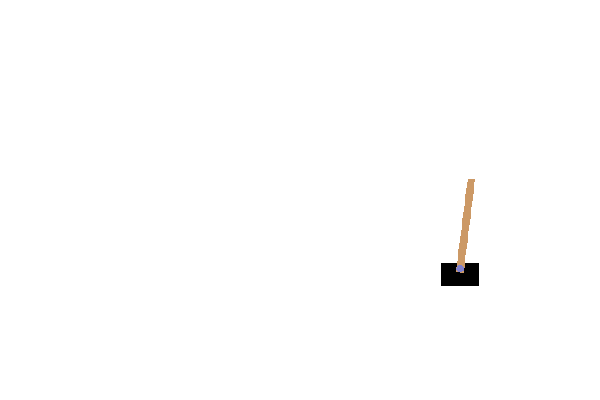

In [6]:
custom_env.animation.run()
custom_env.reset_anime()

In [ ]:
q_network.save("dqn_exp5.h5")
# model = DQN(custom_env, q_network)

In [ ]:
model.test(render=True)

In [ ]:
import time
start_t = time.time()
a = np.random.permutation(int(1e1))
print(time.time()-start_t)


# 